### Initial run

Initial end to end test, a sort of a "teaser" to highlight the motivation for `concurrent_dataloader`. 

In [67]:
from benchmarking.analysis.analyze_results import *

In [118]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/1701ceph-os/")

In [119]:
# s3_folder_filter="1011_4/*benchmark_e2e*"
scratch_folder_filter="ceph_*/*benchmark_e2e_torch*"

Load the data

In [120]:
# df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7191/7191 [00:33<00:00, 212.89it/s]


Create "colors" and "lanes". Colors are used to distinguish different function types, e.g. function that loads a batch, calls the `next_data`, `run_traning_batch` from Lightning and `training_batch_to_device` also from lightning.
Lanes, every single call of the aforementioned funcitons in their own respective lane, so we get a nice overview of when the function is called, and how long it tookl

In [121]:
unique_functions_scratch = np.unique(df_dataloader_scratch["item_x"])
print(f"Unique functions: {unique_functions_scratch}")

colors = {}
for i, color in zip(unique_functions_scratch, ["red", "gold", "blue", "magenta", "aqua"]):
    colors[str(i)] = color
lanes={}
for i, lane in zip(unique_functions_scratch, range(len(unique_functions_scratch))):
    lanes[str(i)] = lane
    
print(f"Lanes: {lanes}")

# unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']
Lanes: {'batch': 0, 'run_training_batch': 1, 'training_batch_to_device': 2}


Extract the GPU Utilization data

In [122]:
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7191/7191 [00:06<00:00, 1157.71it/s]


In [123]:
df_gpuutil_scratch

,timestamp,gpu_util_0,mem_util_0,gpu_util_1,mem_util_1,gpu_util_2,mem_util_2,gpu_util_3,mem_util_3,gpu_util_4,mem_util_4,gpu_util_5,mem_util_5,gpu_util_6,mem_util_6,gpu_util_7,mem_util_7,run
0,1.643030e+09,99.0,1.0,53.0,0.0,46.0,25.0,28.0,0.0,25.0,0.0,35.0,0.0,100.0,1.0,41.0,14.0,20220124f141500_benchmark_e2e_torch_ceph-os_25...
1,1.643030e+09,99.0,2.0,43.0,0.0,21.0,0.0,27.0,0.0,27.0,0.0,19.0,0.0,96.0,2.0,19.0,0.0,20220124f141500_benchmark_e2e_torch_ceph-os_25...
2,1.643030e+09,66.0,15.0,30.0,0.0,28.0,0.0,30.0,5.0,27.0,0.0,18.0,0.0,99.0,12.0,7.0,0.0,20220124f141500_benchmark_e2e_torch_ceph-os_25...
3,1.643030e+09,66.0,2.0,36.0,0.0,30.0,0.0,19.0,0.0,31.0,11.0,32.0,0.0,100.0,2.0,29.0,14.0,20220124f141500_benchmark_e2e_torch_ceph-os_25...
4,1.643030e+09,99.0,5.0,51.0,0.0,21.0,0.0,33.0,0.0,21.0,0.0,32.0,0.0,100.0,1.0,32.0,0.0,20220124f141500_benchmark_e2e_torch_ceph-os_25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20808,1.642600e+09,99.0,1.0,32.0,0.0,33.0,0.0,31.0,0.0,26.0,0.0,22.0,11.0,77.0,21.0,33.0,14.0,20220119f101806_benchmark_e2e_torch_ceph-os_25...
20809,1.642600e+09,67.0,15.0,44.0,0.0,29.0,0.0,35.0,14.0,40.0,7.0,25.0,14.0,94.0,1.0,36.0,0.0,20220119f101806_benchmark_e2e_torch_ceph-os_25...
20810,1.642600e+09,99.0,9.0,33.0,0.0,33.0,0.0,30.0,0.0,28.0,0.0,25.0,14.0,73.0,26.0,33.0,14.0,20220119f101806_benchmark_e2e_torch_ceph-os_25...
20811,1.642600e+09,72.0,15.0,48.0,1.0,99.0,35.0,36.0,14.0,43.0,9.0,25.0,14.0,79.0,22.0,32.0,0.0,20220119f101806_benchmark_e2e_torch_ceph-os_25...


In [124]:
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

In [125]:
print(unique_runs_scratch)

['20220117f134939_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220117f191912_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220118f005306_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220119f002257_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220119f052106_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220119f101806_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220120f082308_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220120f132250_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220120f182627_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220121f163311_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220121f213248_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220122f023515_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220123f005049_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220123f055359_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 

In [126]:
df_gpuutil_scratch_corr = df_gpuutil_scratch[num_gpus:]
df_gpuutil_scratch_corr.dropna(subset = ["run"], inplace=True)
unique_runs_scratch_2 = np.unique(df_gpuutil_scratch_corr["run"].to_list())
print(unique_runs_scratch_2)

['20220117f134939_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220117f191912_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220118f005306_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220119f002257_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220119f052106_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220119f101806_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220120f082308_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220120f132250_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220120f182627_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220121f163311_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220121f213248_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 '20220122f023515_benchmark_e2e_torch_ceph-os_256_4_16_0_vanilla_sync'
 '20220123f005049_benchmark_e2e_torch_ceph-os_256_4_16_0_asyncio_sync'
 '20220123f055359_benchmark_e2e_torch_ceph-os_256_4_16_0_threaded_sync'
 

/iarai/home/ivan.svogor/.conda/envs/storage-benchmarking/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Plot function timelines for remote storage (AWS S3)

### Plot function timelines for local storage

### Result tables
Print throughput in loaded images per second, and function duration in seconds, for S3 and Scratch

In [129]:
import math

batch_size = 256
dataset_limit = 35000
epochs = 100
batches_per_epoch = math.ceil(dataset_limit / batch_size)
print(batches_per_epoch)
print(batches_per_epoch*epochs)

137
13700


In [130]:
def show_timelines_with_gpu3(df, gpu_util, lanes, colors, run, batches_per_epoch, flat=False, show_gpu=False, zoom=False, zoom_epochs=1, gpu_index="2"):
    fig, ax = plt.subplots(figsize=(30, 25))
    plt.rcParams.update({"font.size": 18})
    start = min(df["start_time_x"])
    end = max(df["end_time_y"])

    total_runtime = end - start
    
    lane = 0
    batch_ctr = 0 
    epoch_ctr = 0
    epochs_start = []
    epochs_end = []
    for _, row in df.sort_values(["start_time_x"], ascending=True).iterrows():
        duration = row["end_time_y"] - row["start_time_x"]
        x1 = row["start_time_x"] - start
        if duration < 0.15:
            duration = 0.2
        x2 = x1 + duration
        if not flat:
            lane += 10
        else:
            lane = lanes[row["item_x"]]
        ax.plot([x1, x2], [lane, lane], color=colors[row["item_x"]], label=row["item_x"], linewidth=3)
        batch_ctr += 1
      
        if batch_ctr == batches_per_epoch:
            ax.plot([x1, x2], [lane, lane], color="red", label=row["item_x"], linewidth=3)
            batch_ctr = 0
            epochs_end.append(x2)
            epoch_ctr += 1 
        elif batch_ctr == 1:
            epochs_start.append(x1)
            ax.plot([x1, x2], [lane, lane], color="red", label=row["item_x"], linewidth=3)

    print(f"Num: {len(df.sort_values(['start_time_x']))}")

    ax.set_xlabel("Experiment duration (S)", loc="right")
    ax.set_ylabel("Operation activity lane", loc="center")
    filename = run.split("_")

    ax.legend()
    ax.grid(linestyle="--", which="both")

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Put a legend below current axis
    ax.legend(
        by_label.values(),
        by_label.keys(),
        loc="upper center",
        bbox_to_anchor=(0.5, -0.05),
        fancybox=True,
        shadow=True,
        ncol=5,
    )

    gpu_util_mean_no_zeros = 0

    plt.show()
    return {
        "runtime": end - start,
        "implementation": filename[9],
        "cache": filename[8],
        "library": filename[3],
        "epoch_starts": epochs_start,
        "epoch_ends": epochs_end,
        "run": run,
    }

Num: 13700


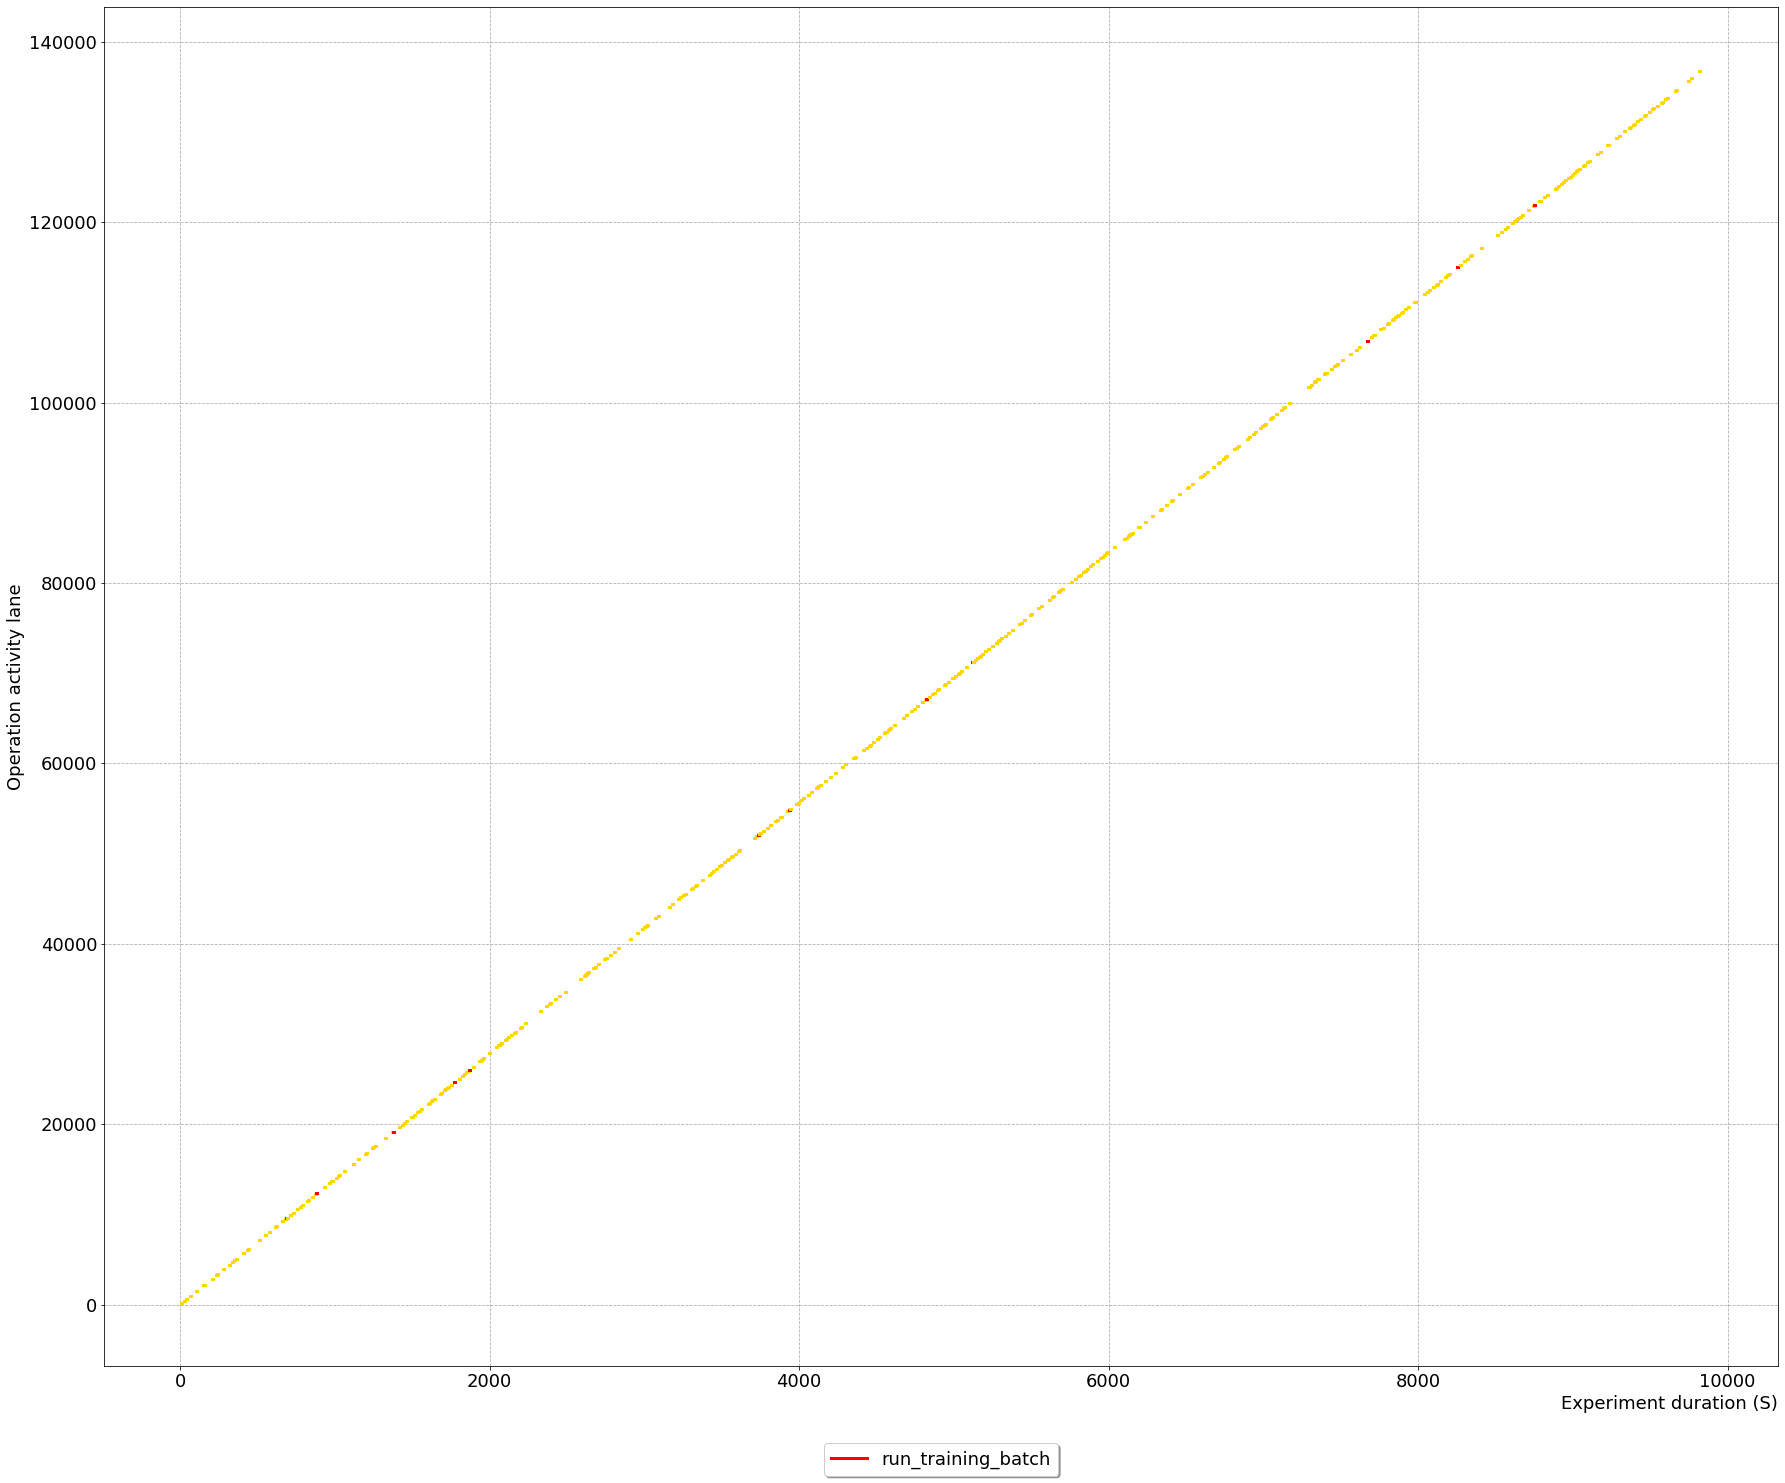

Num: 13702


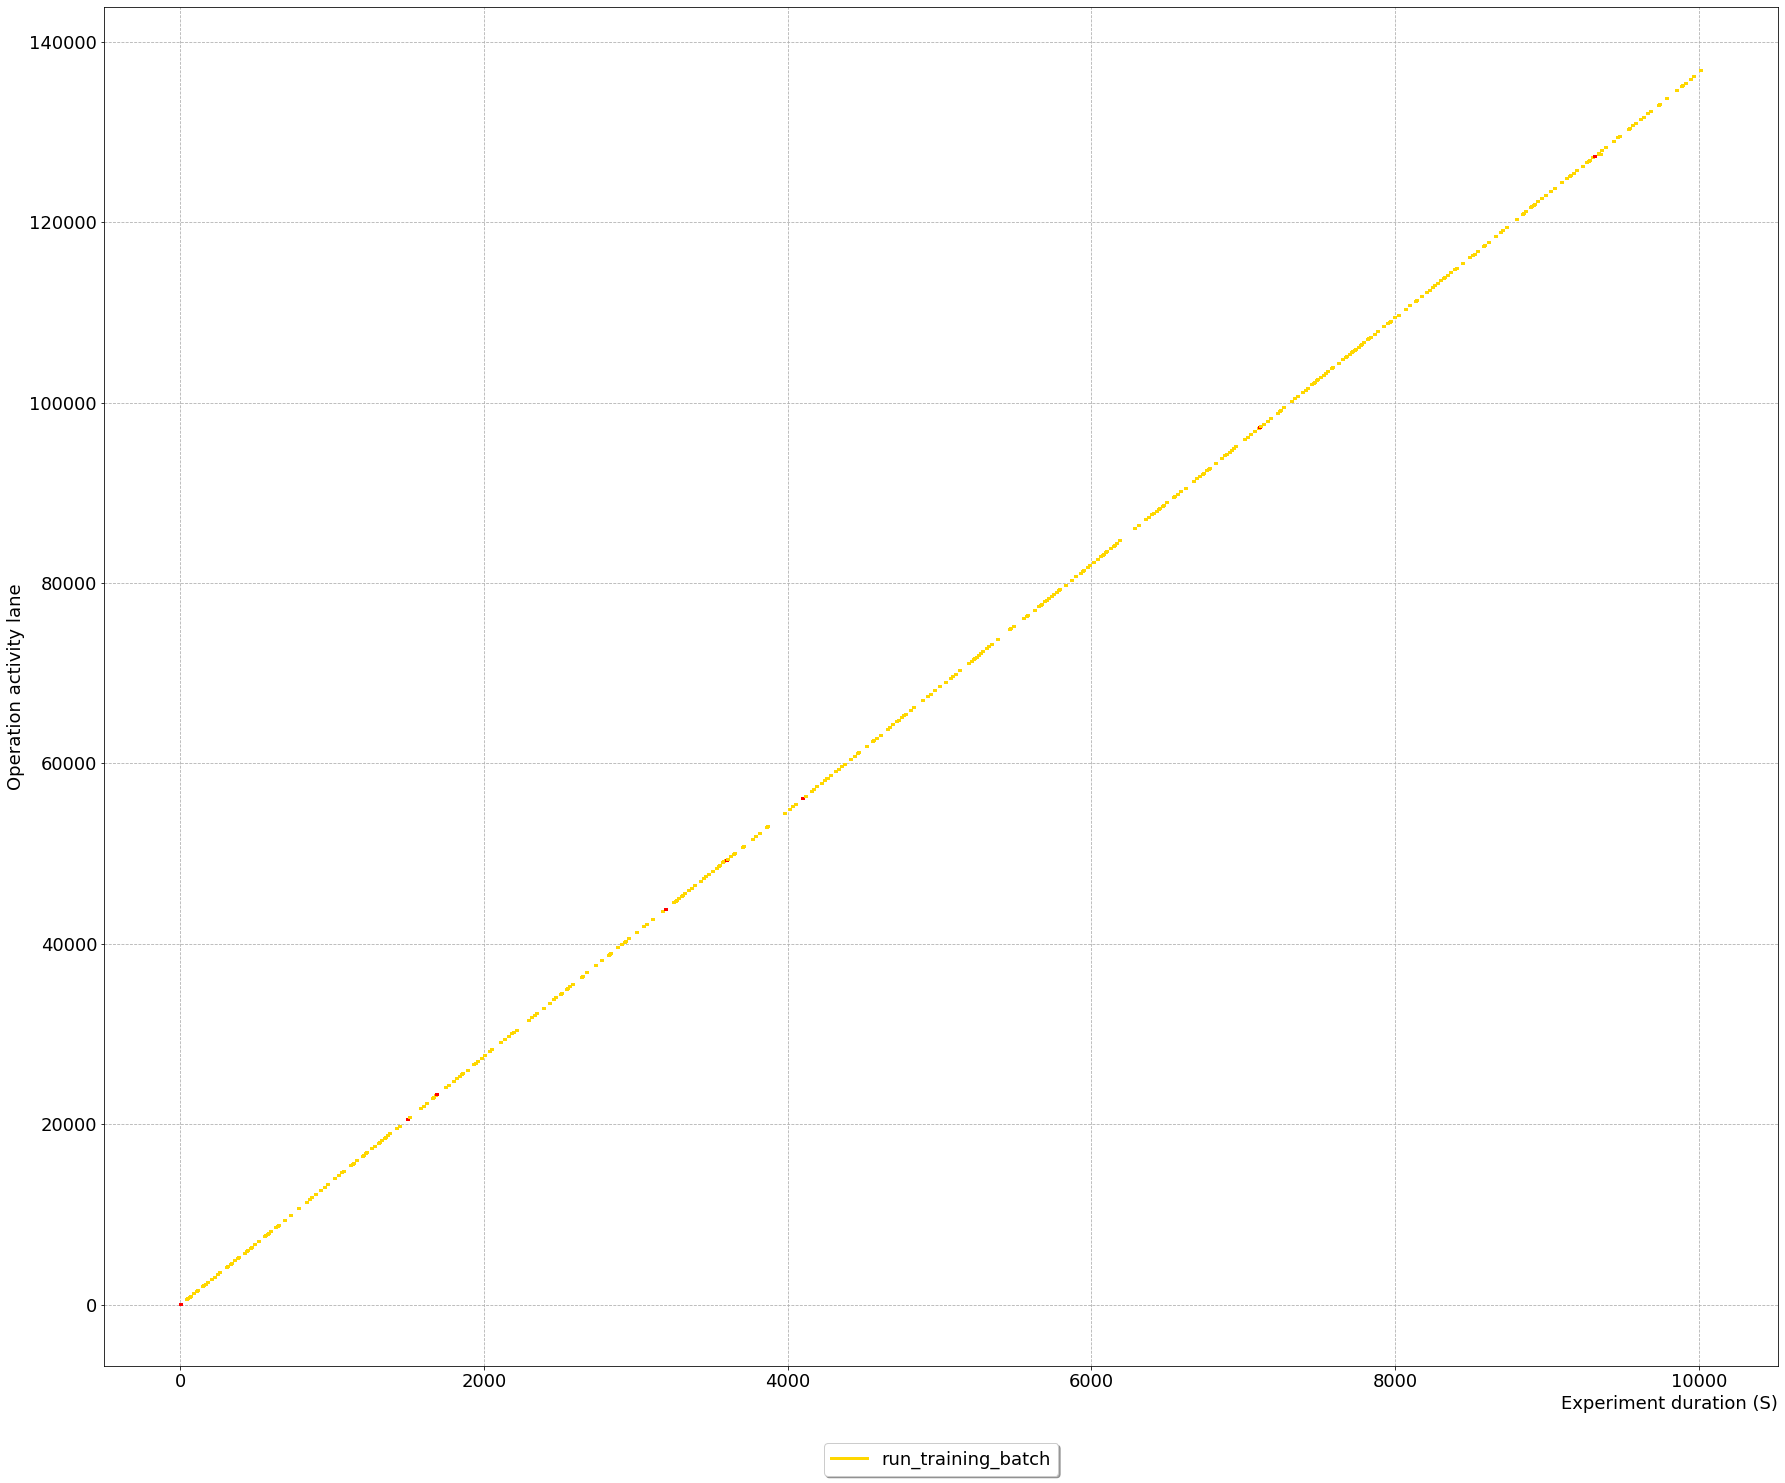

Num: 13700


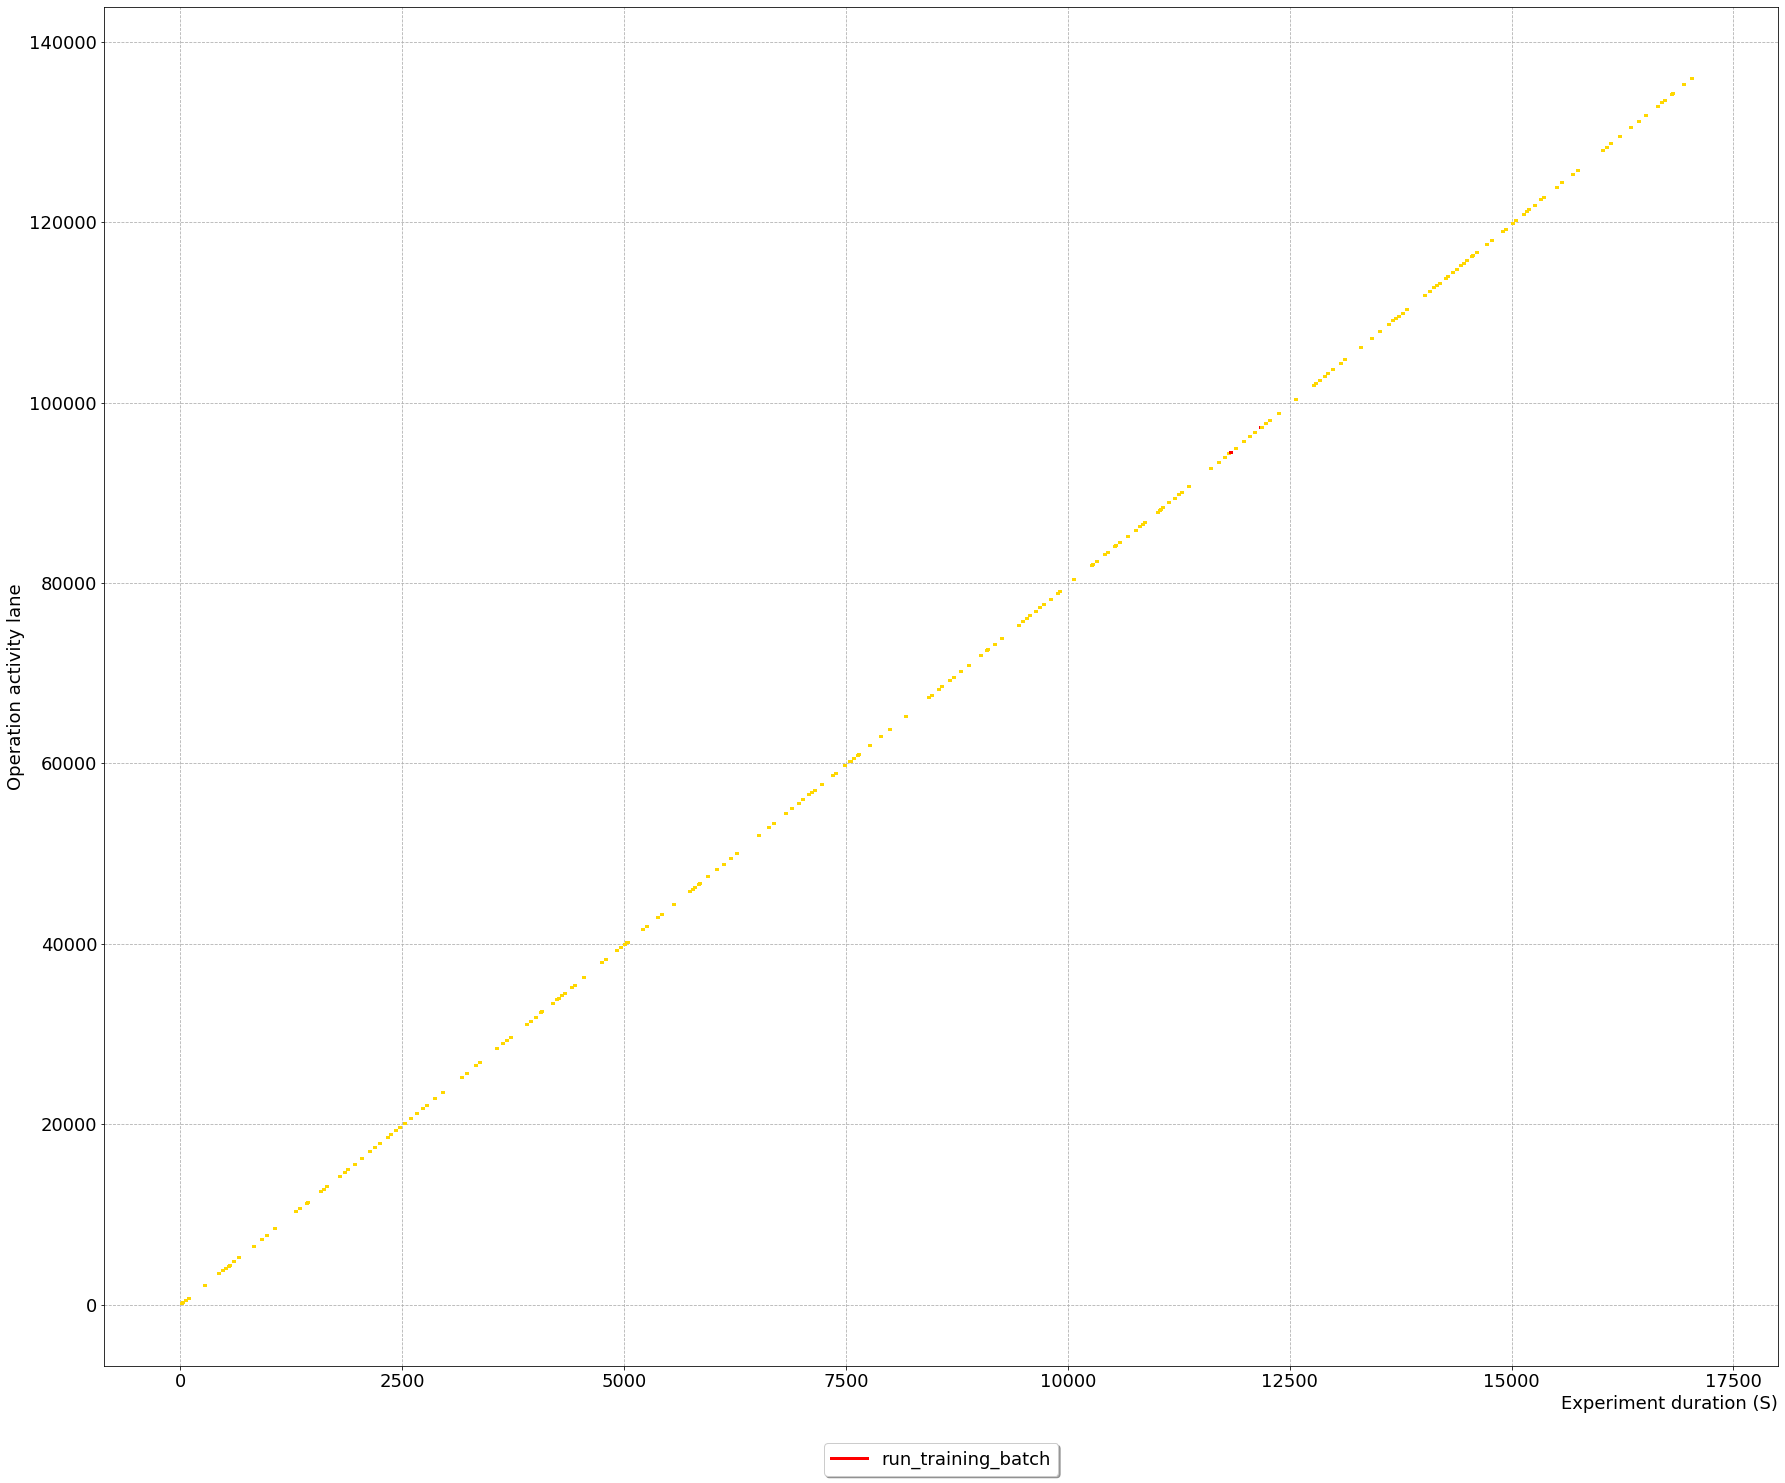

Num: 13700


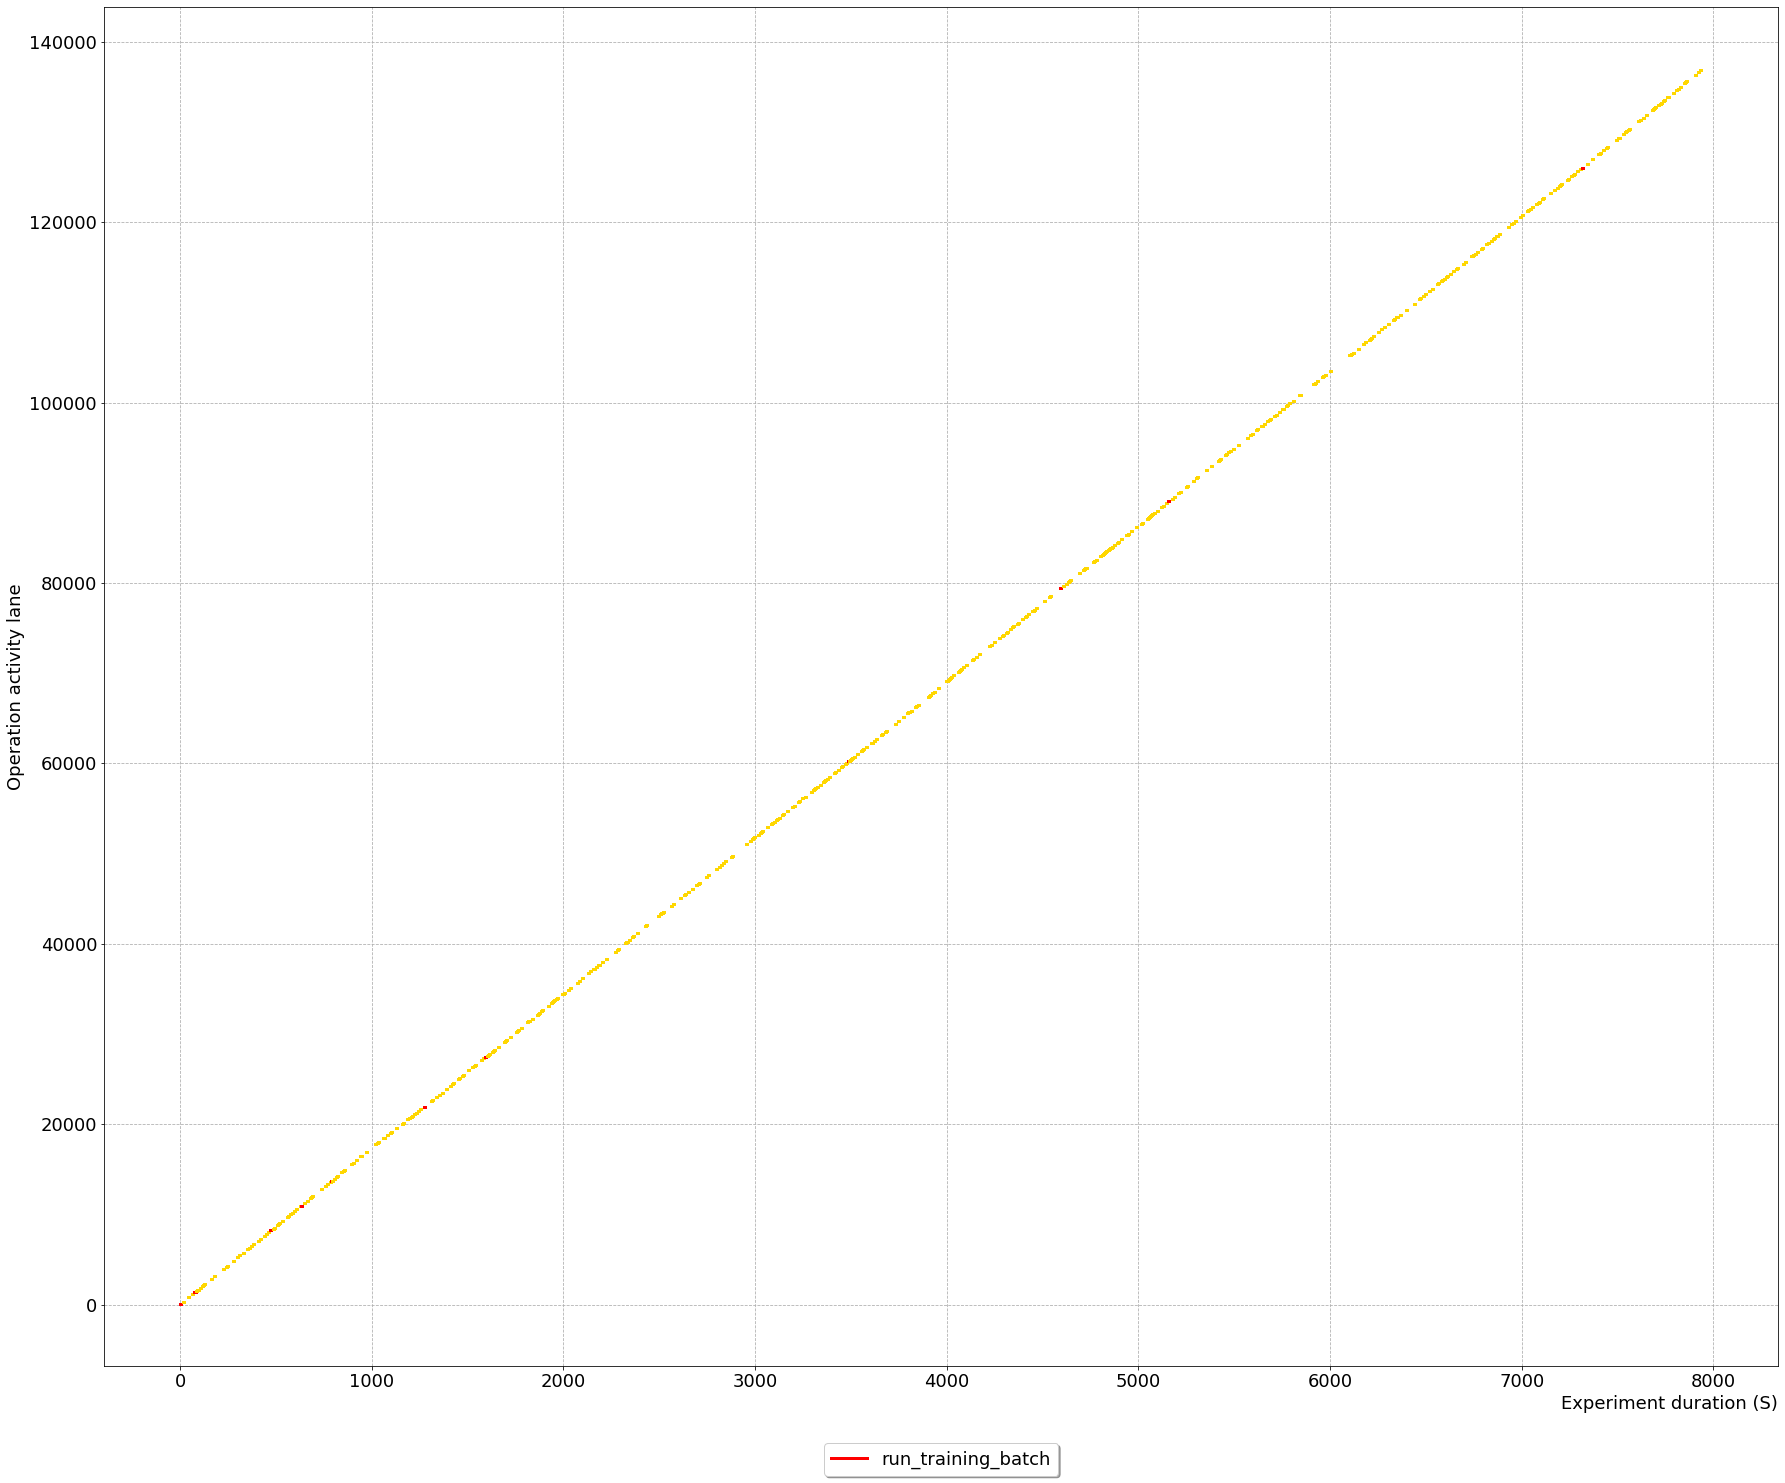

Num: 13702


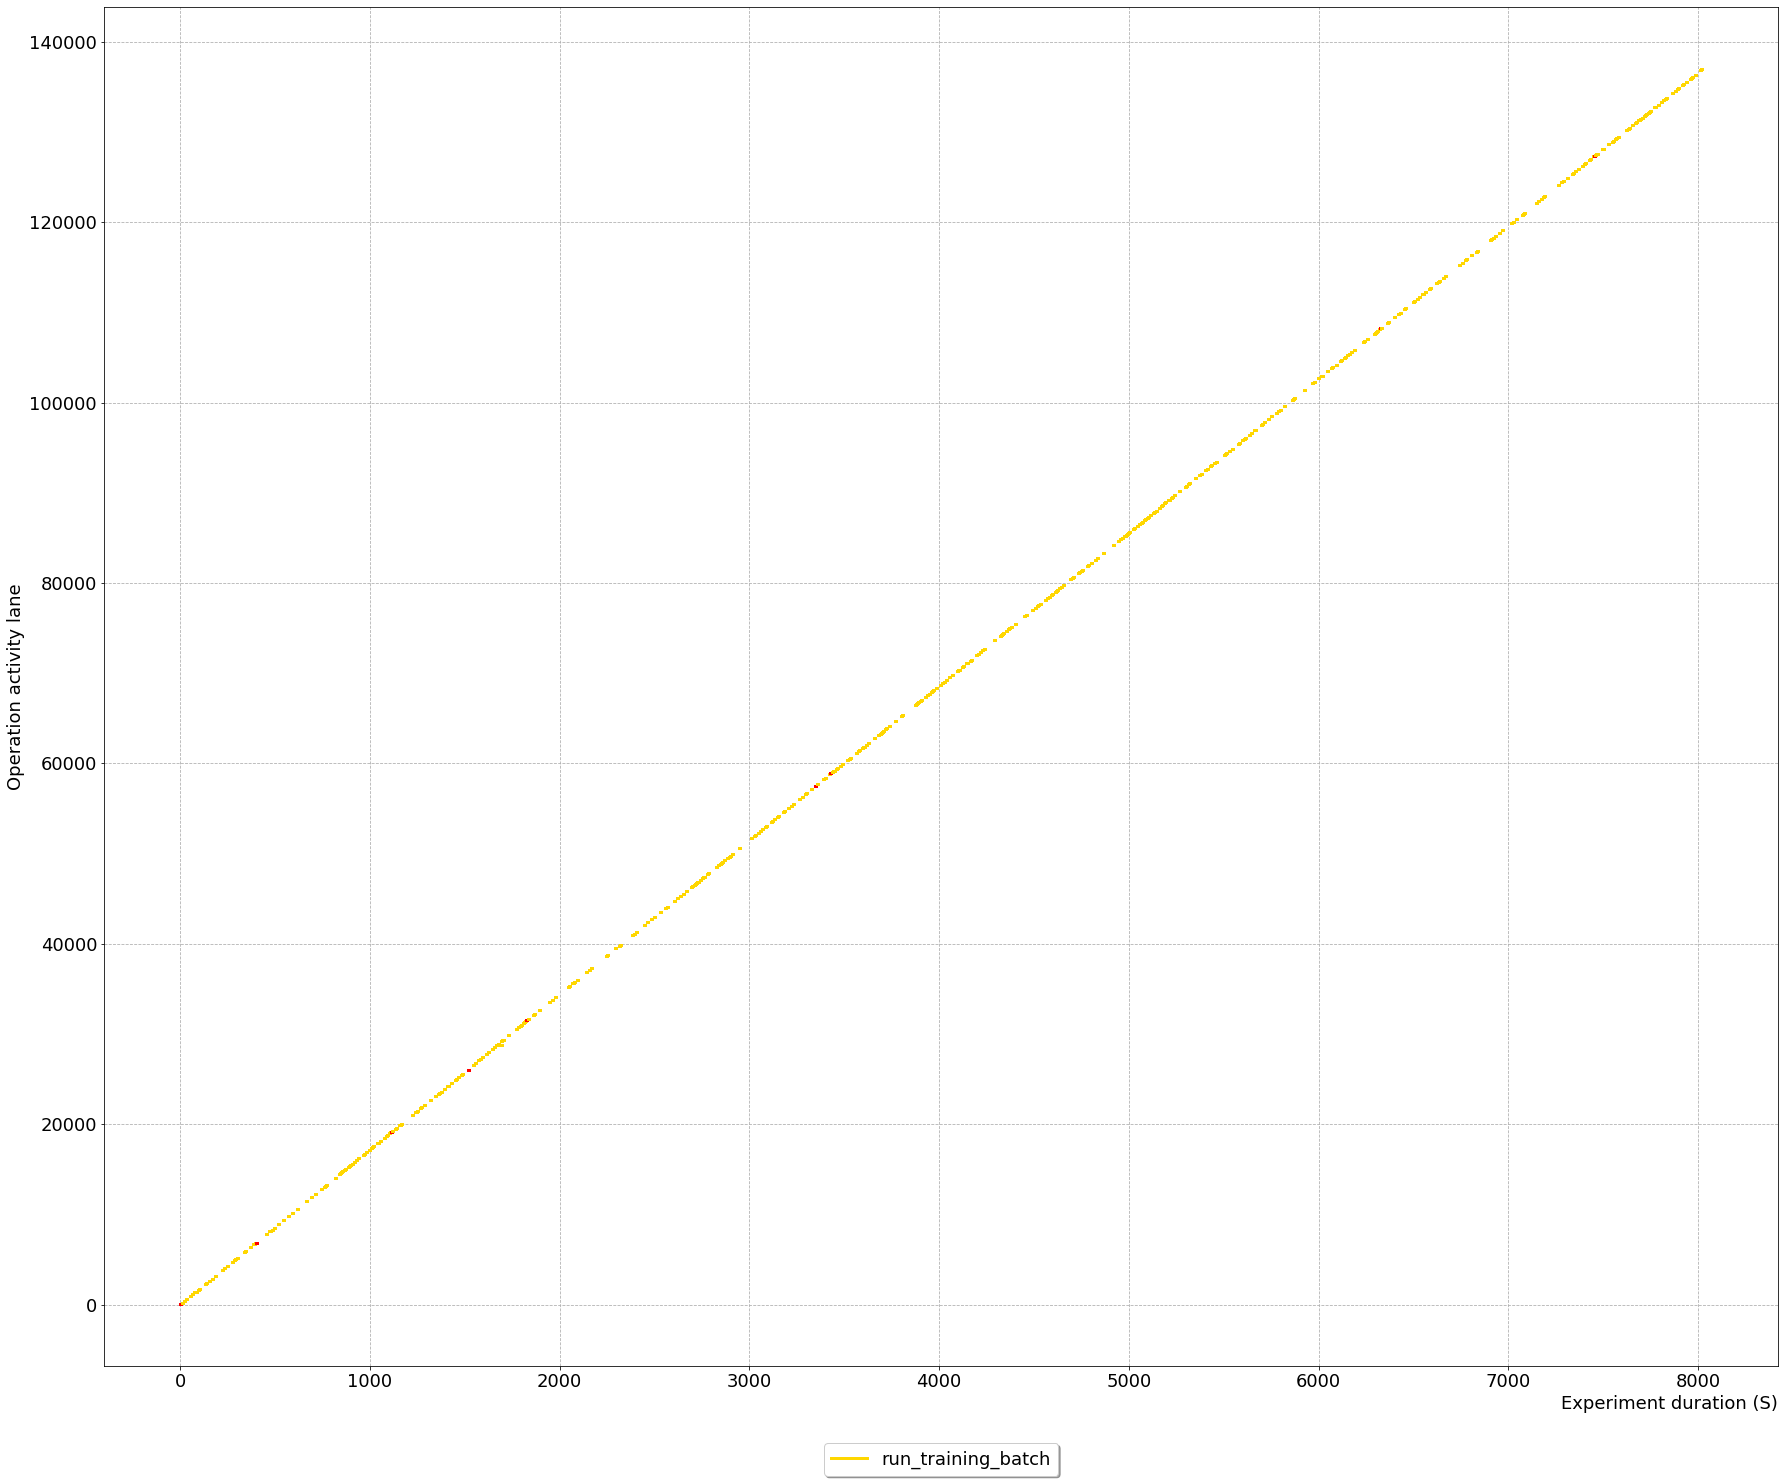

Num: 13700


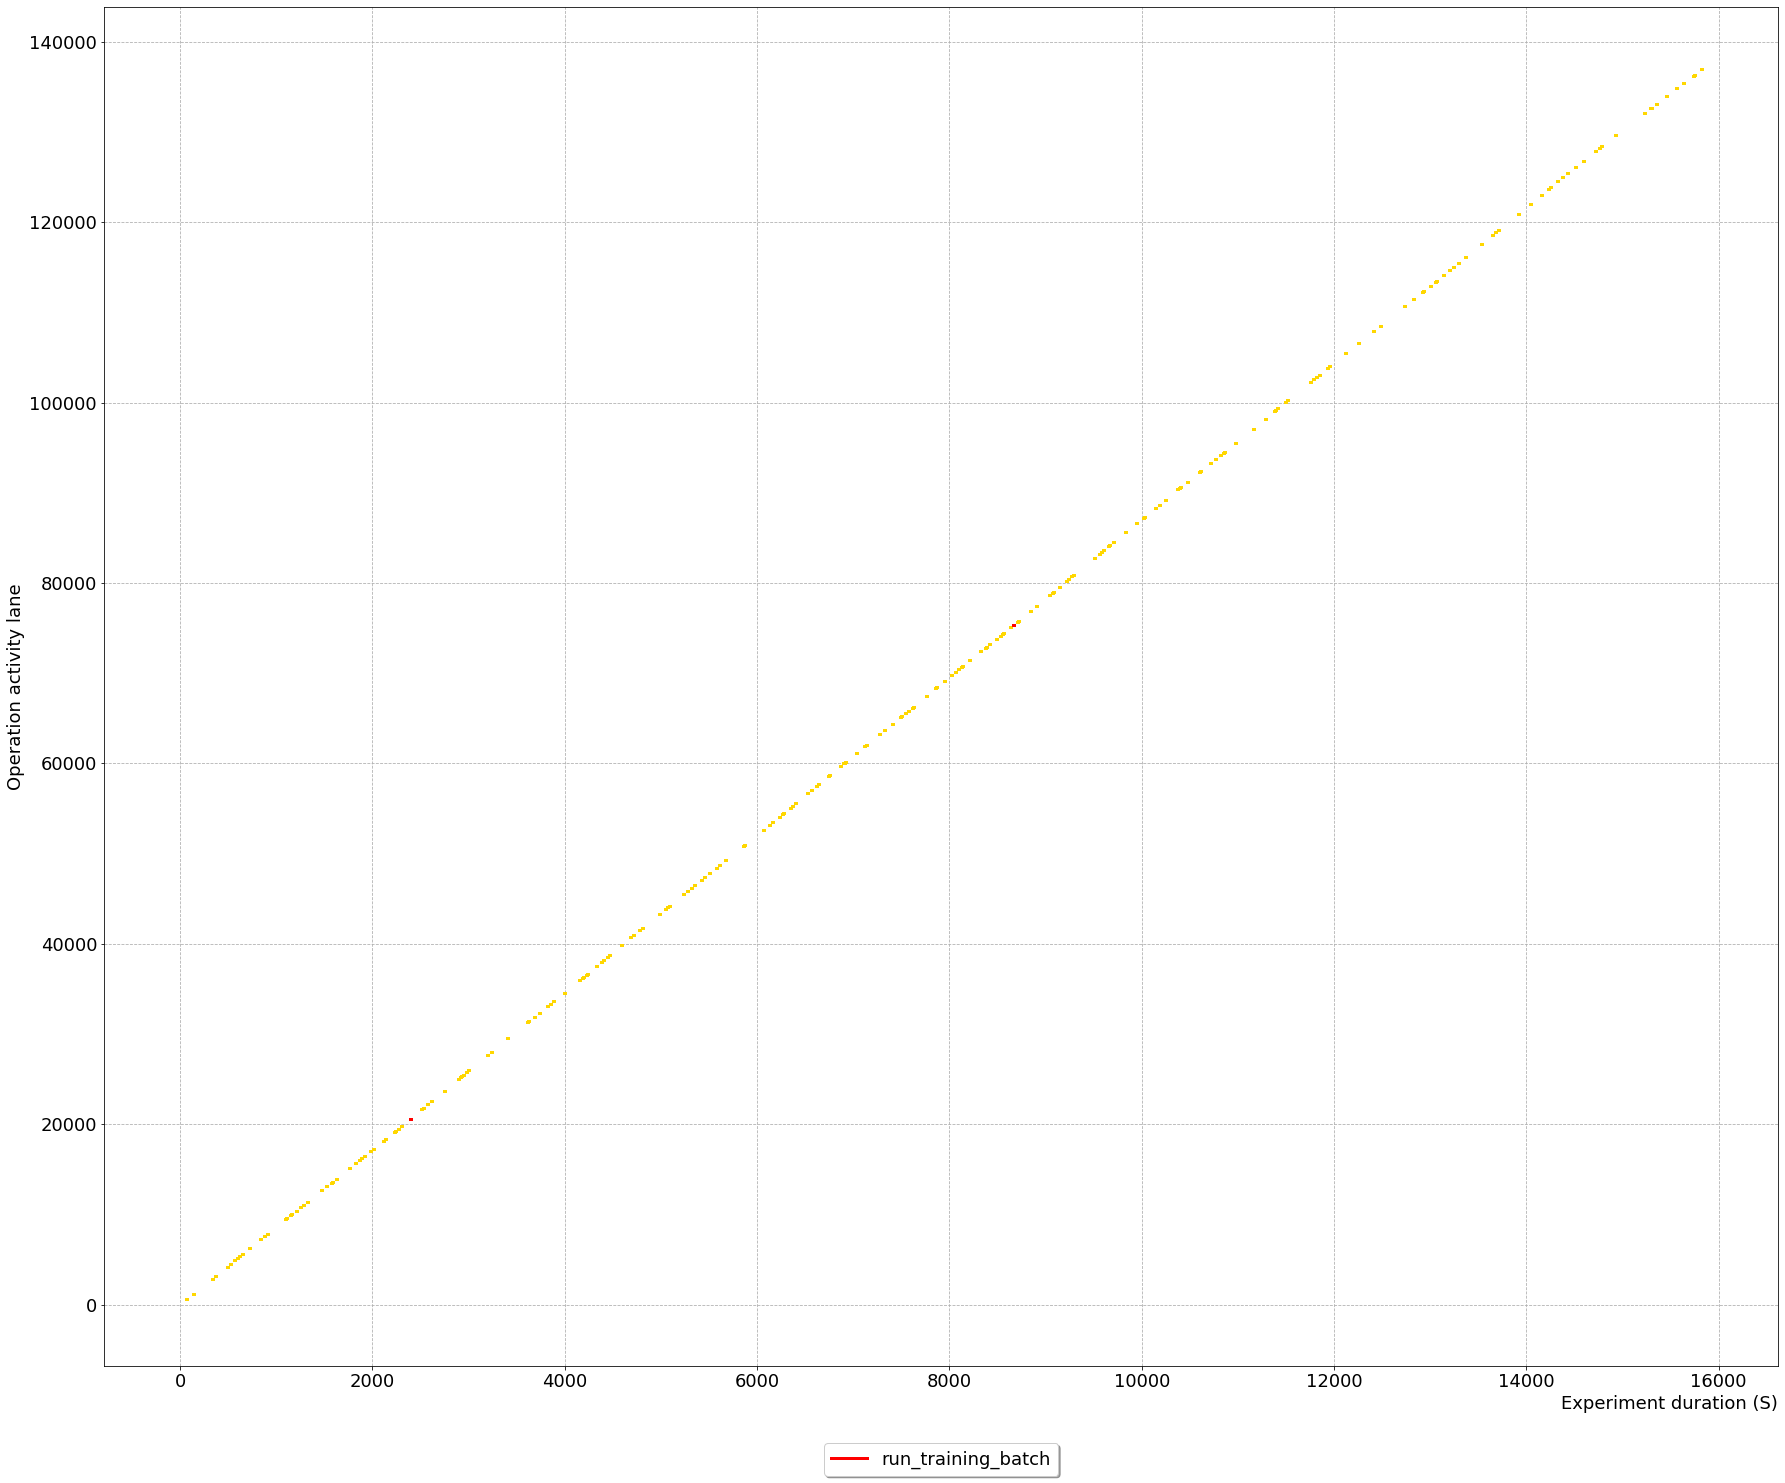

Num: 13700


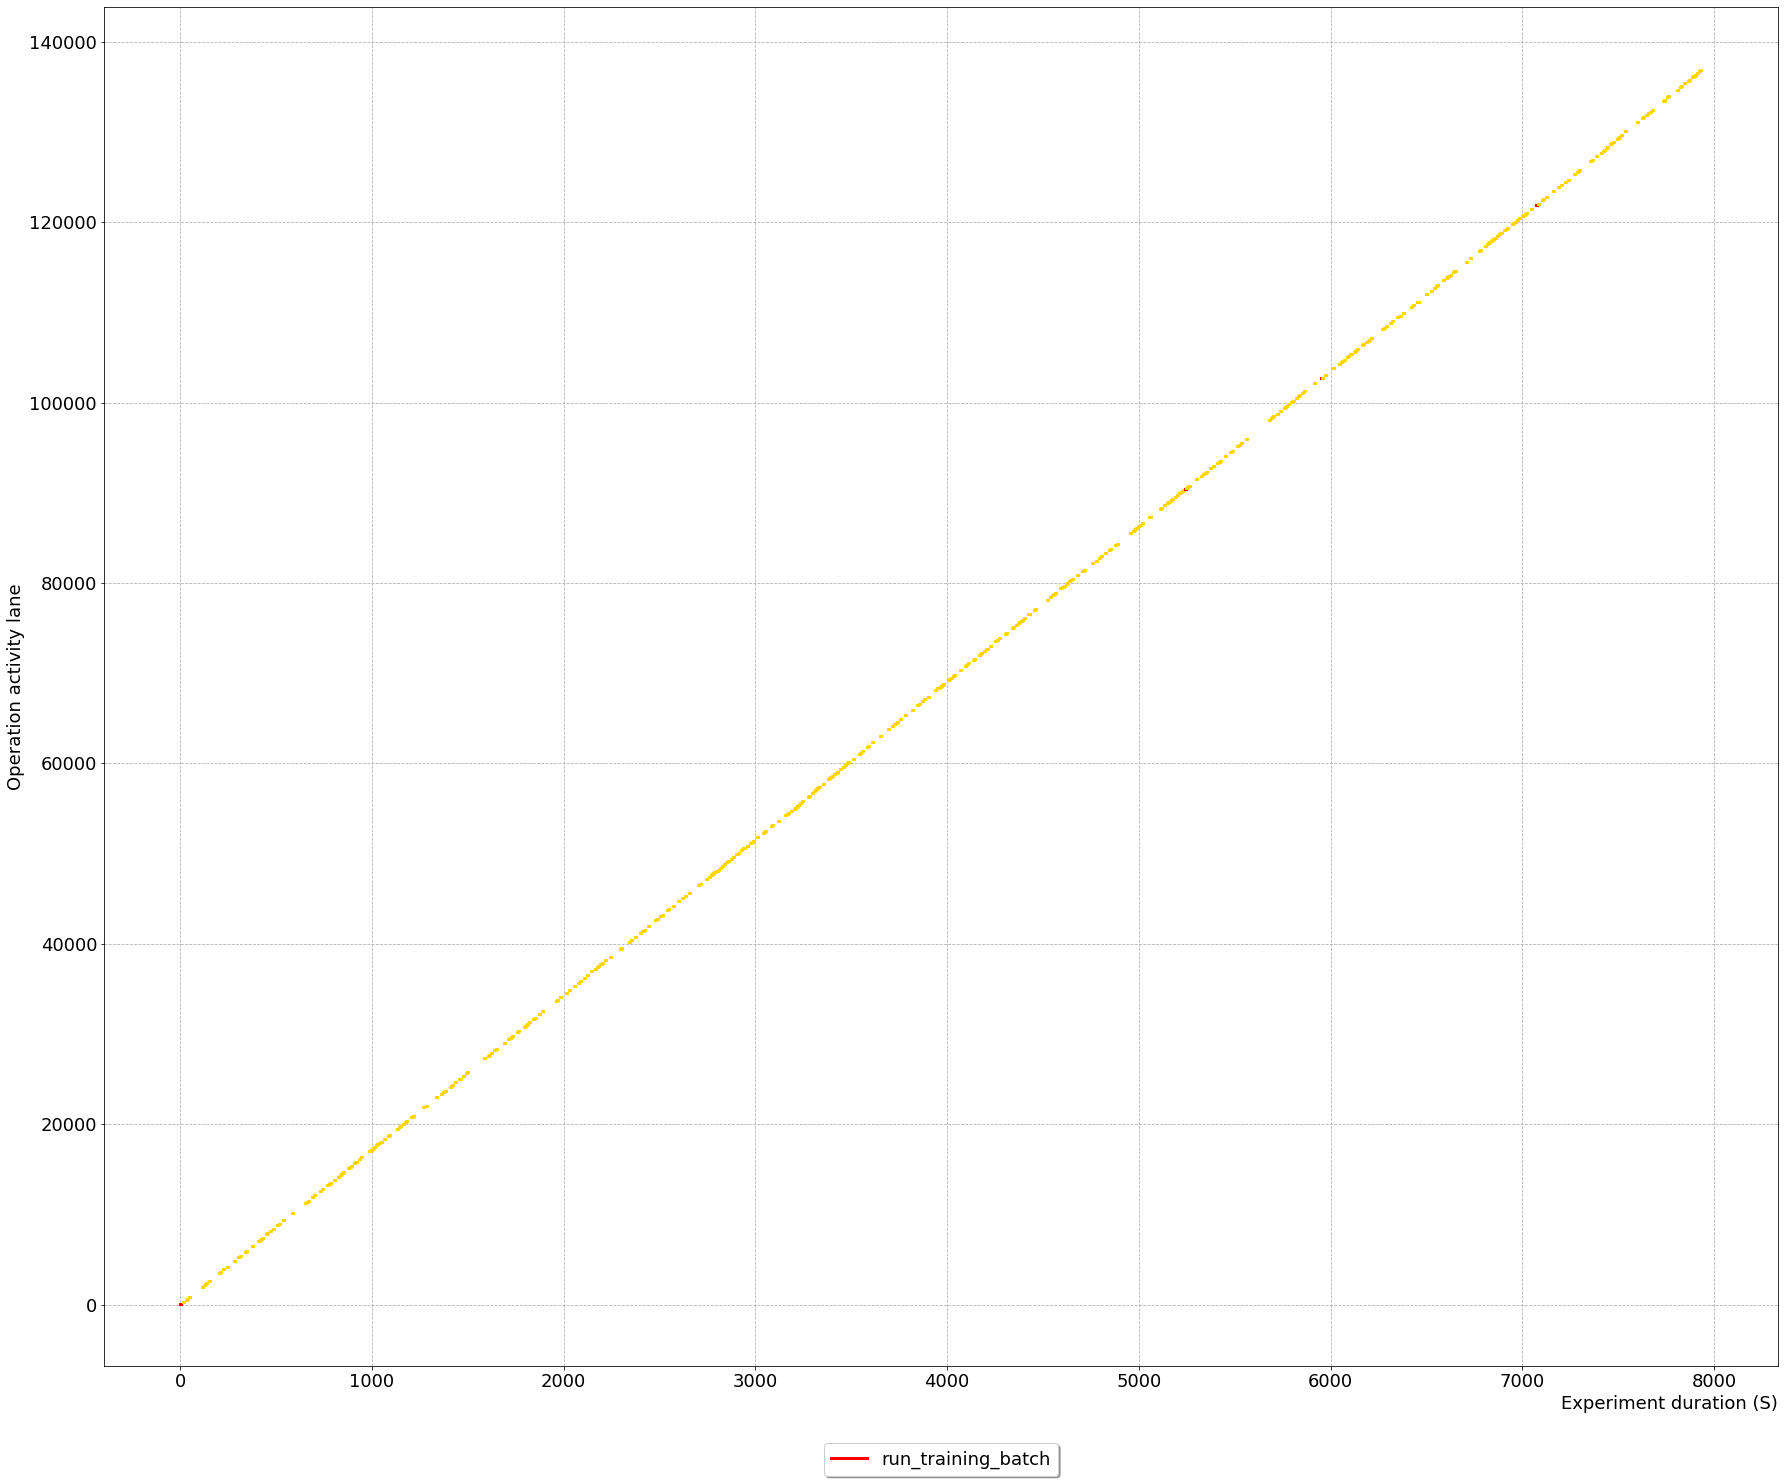

Num: 13702


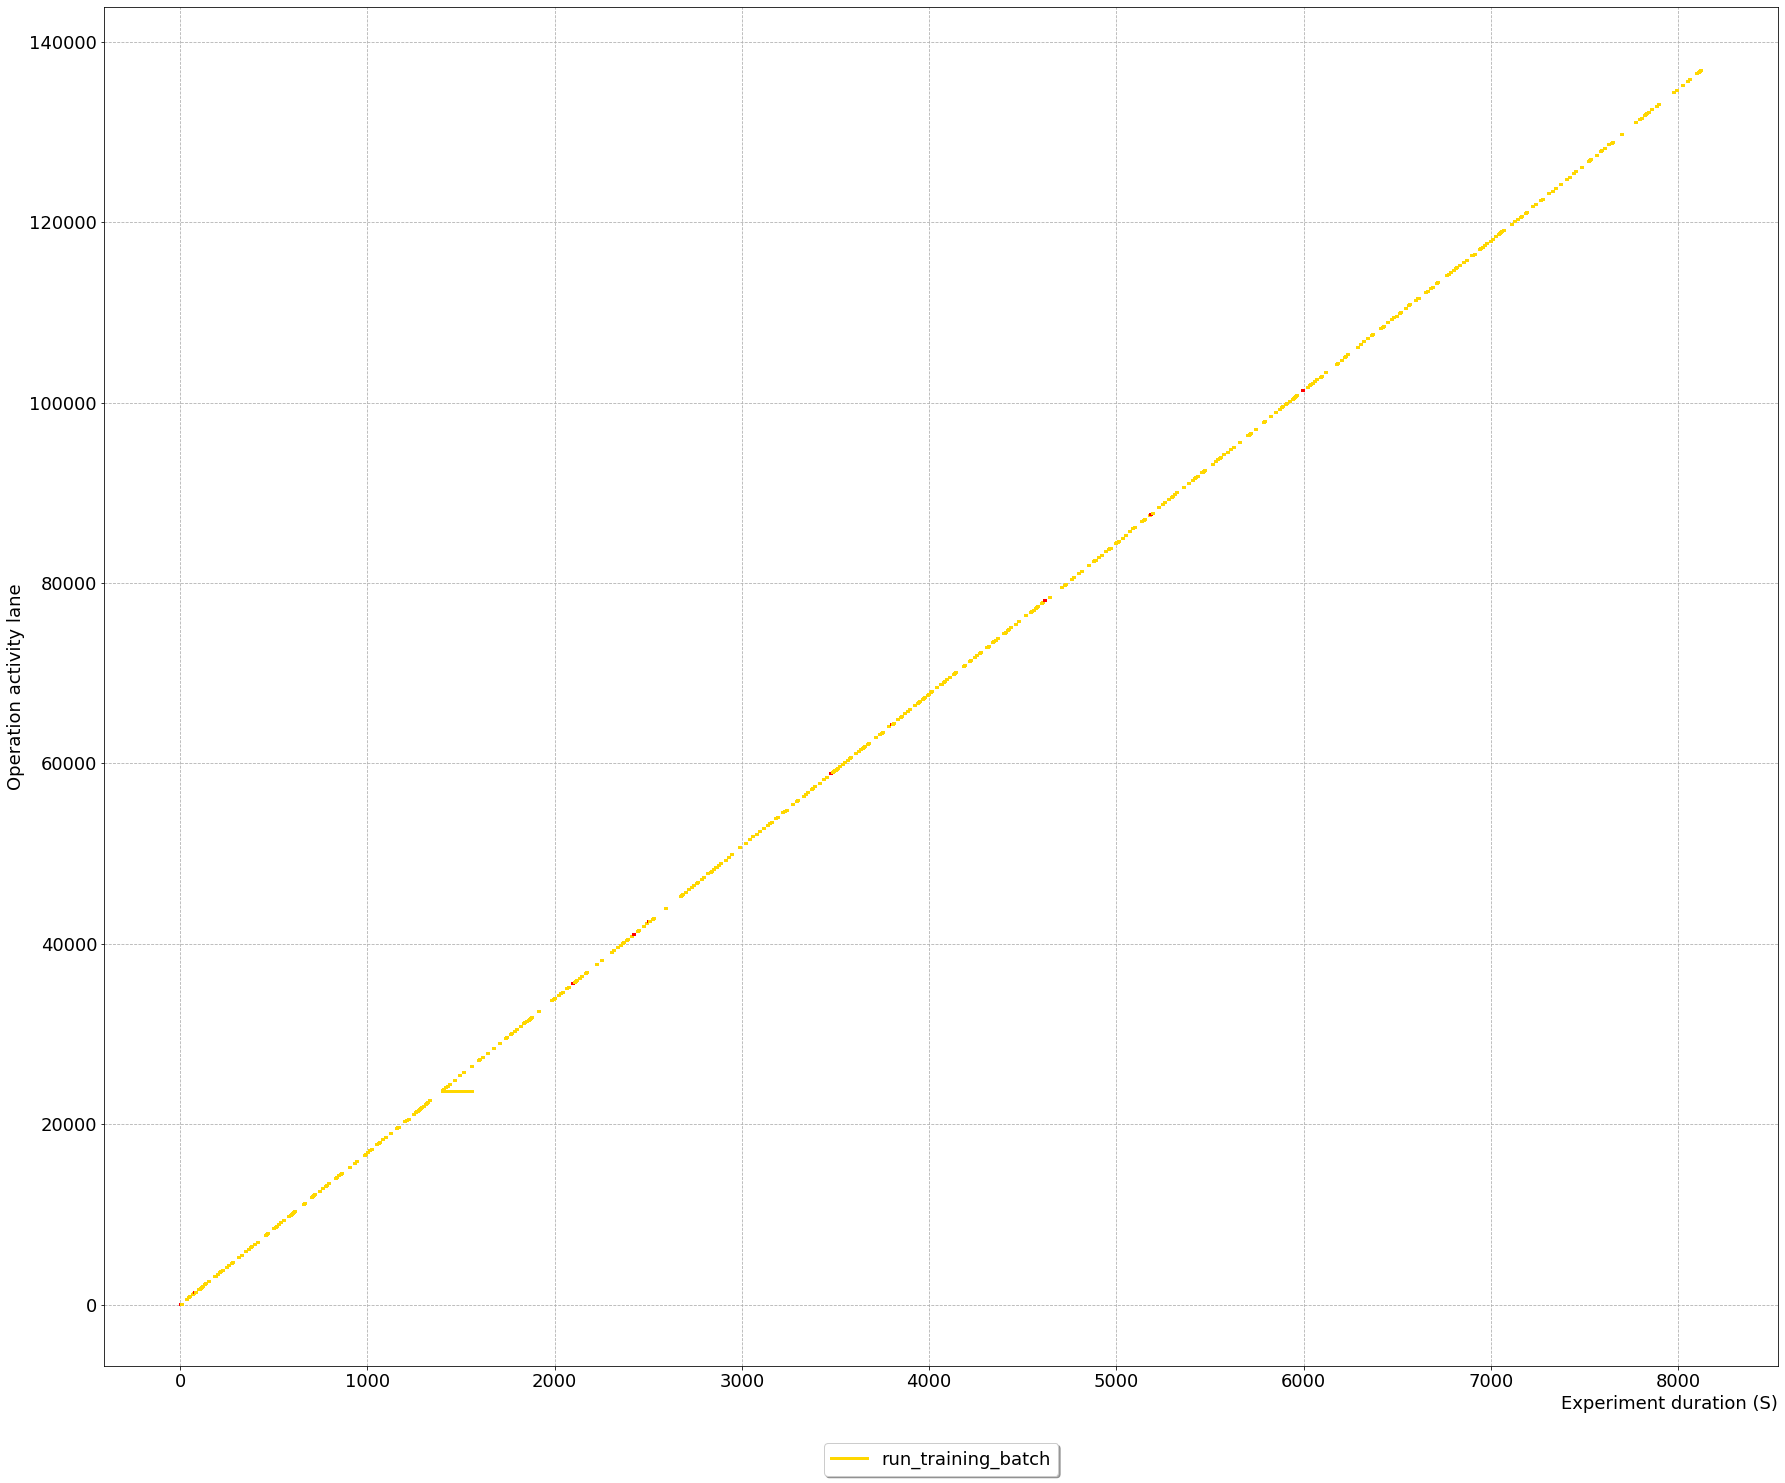

Num: 13700


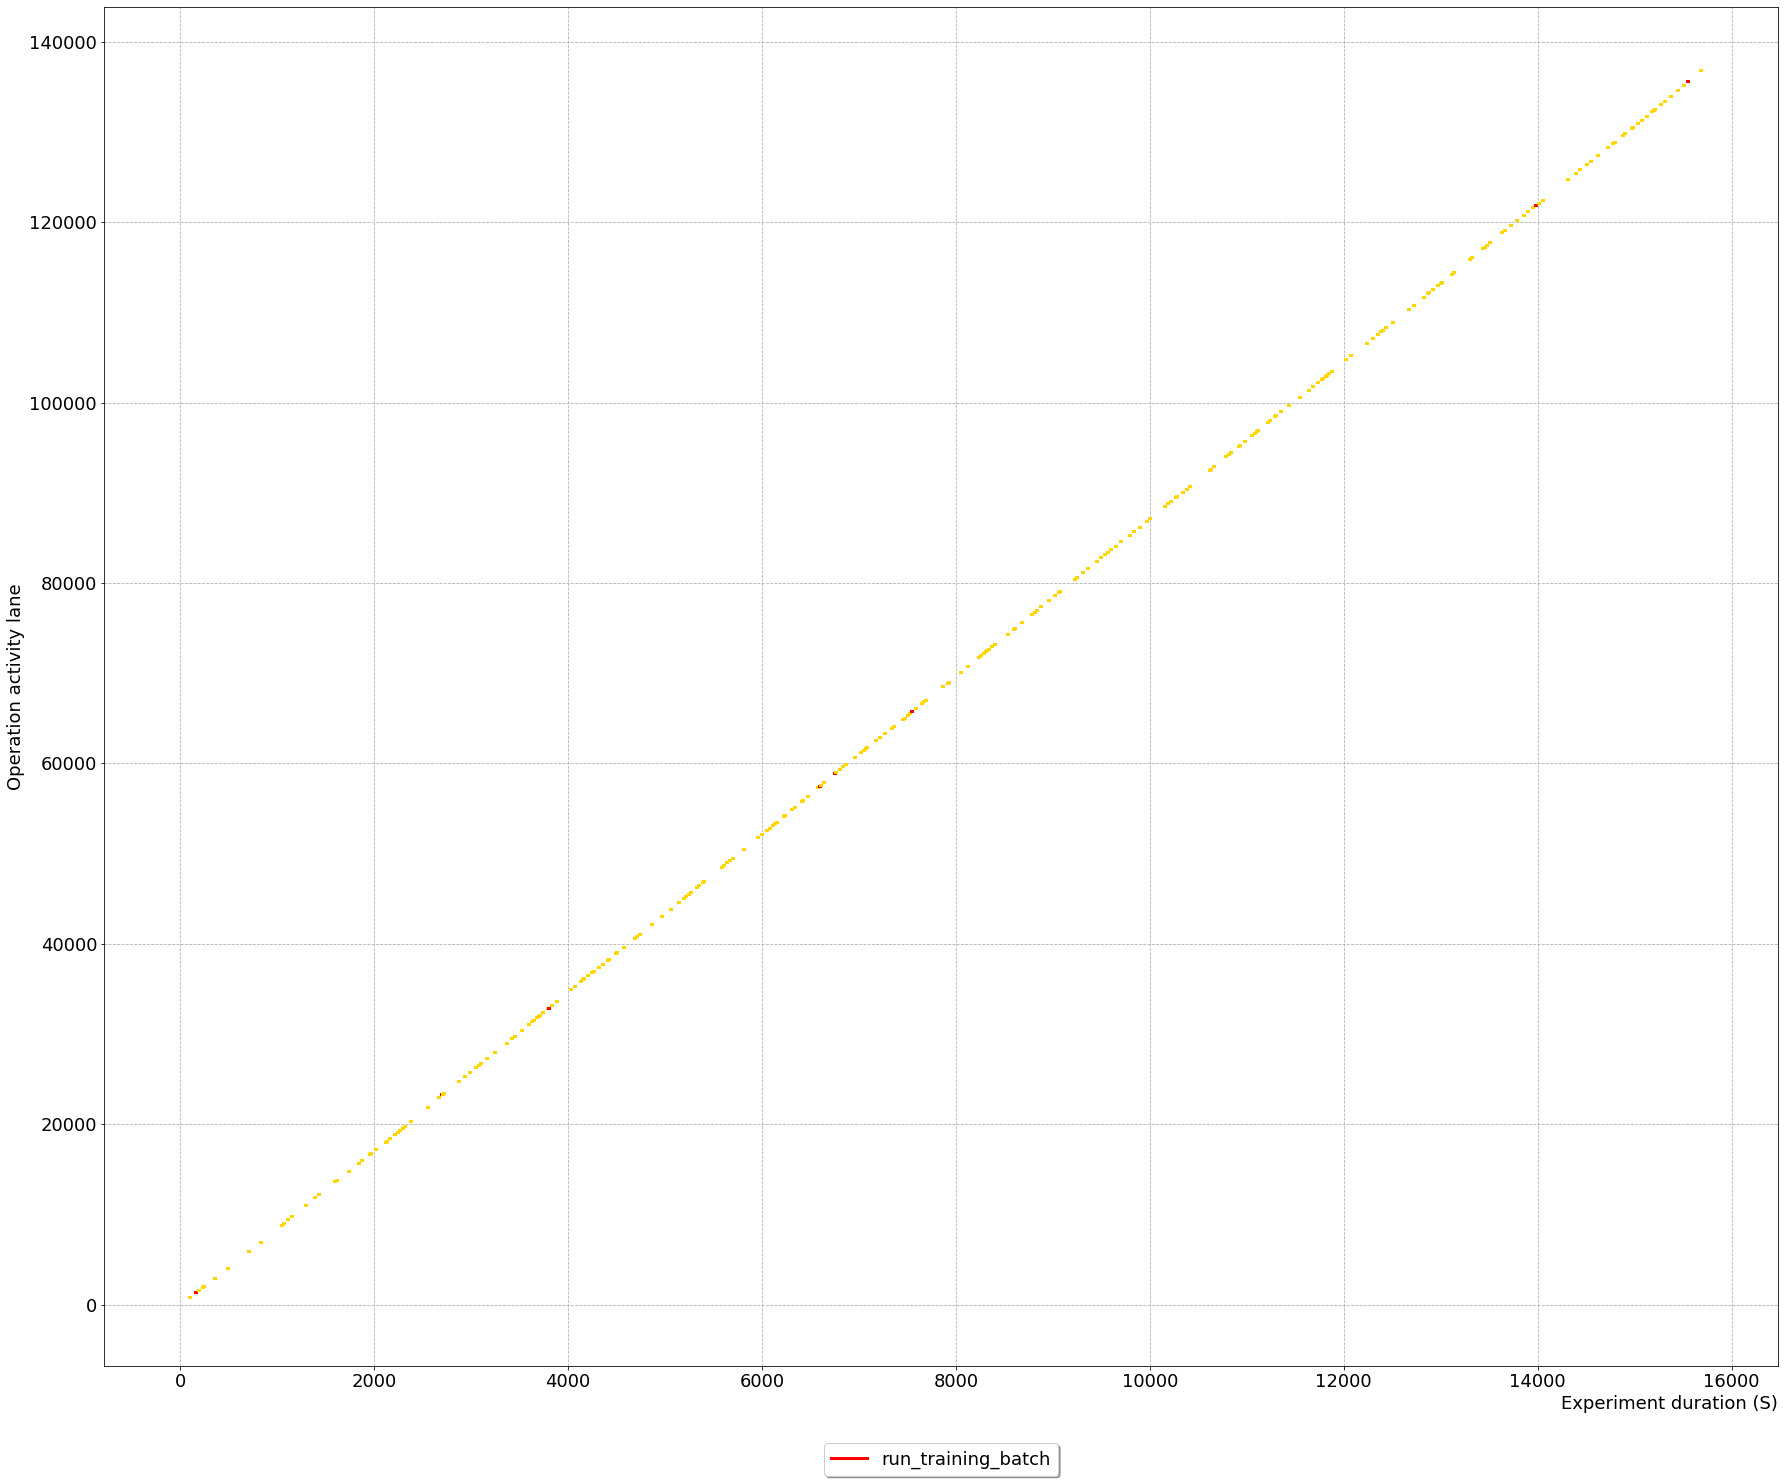

Num: 13700


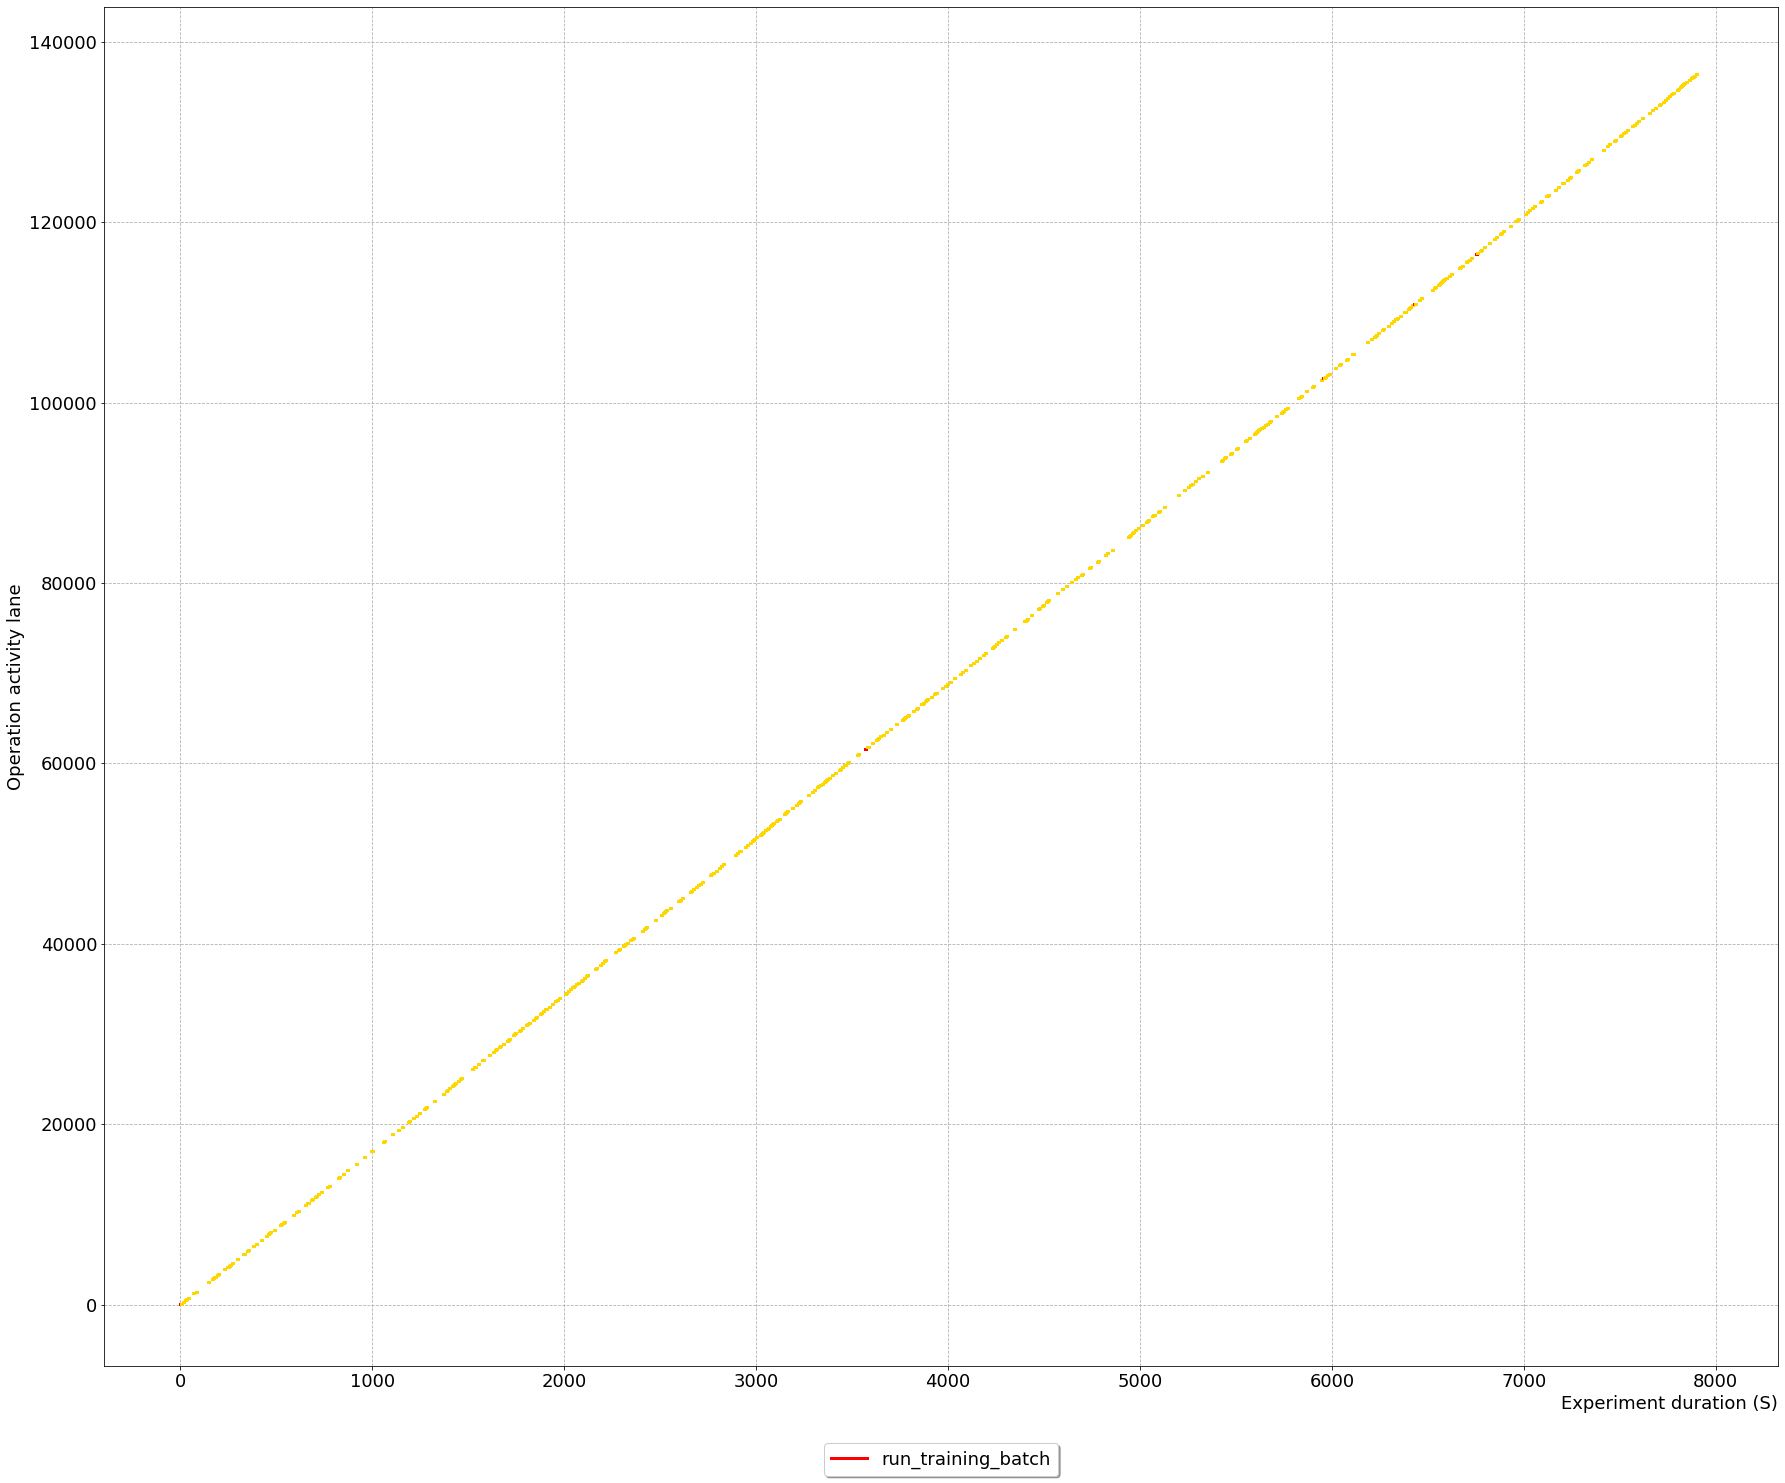

Num: 13704


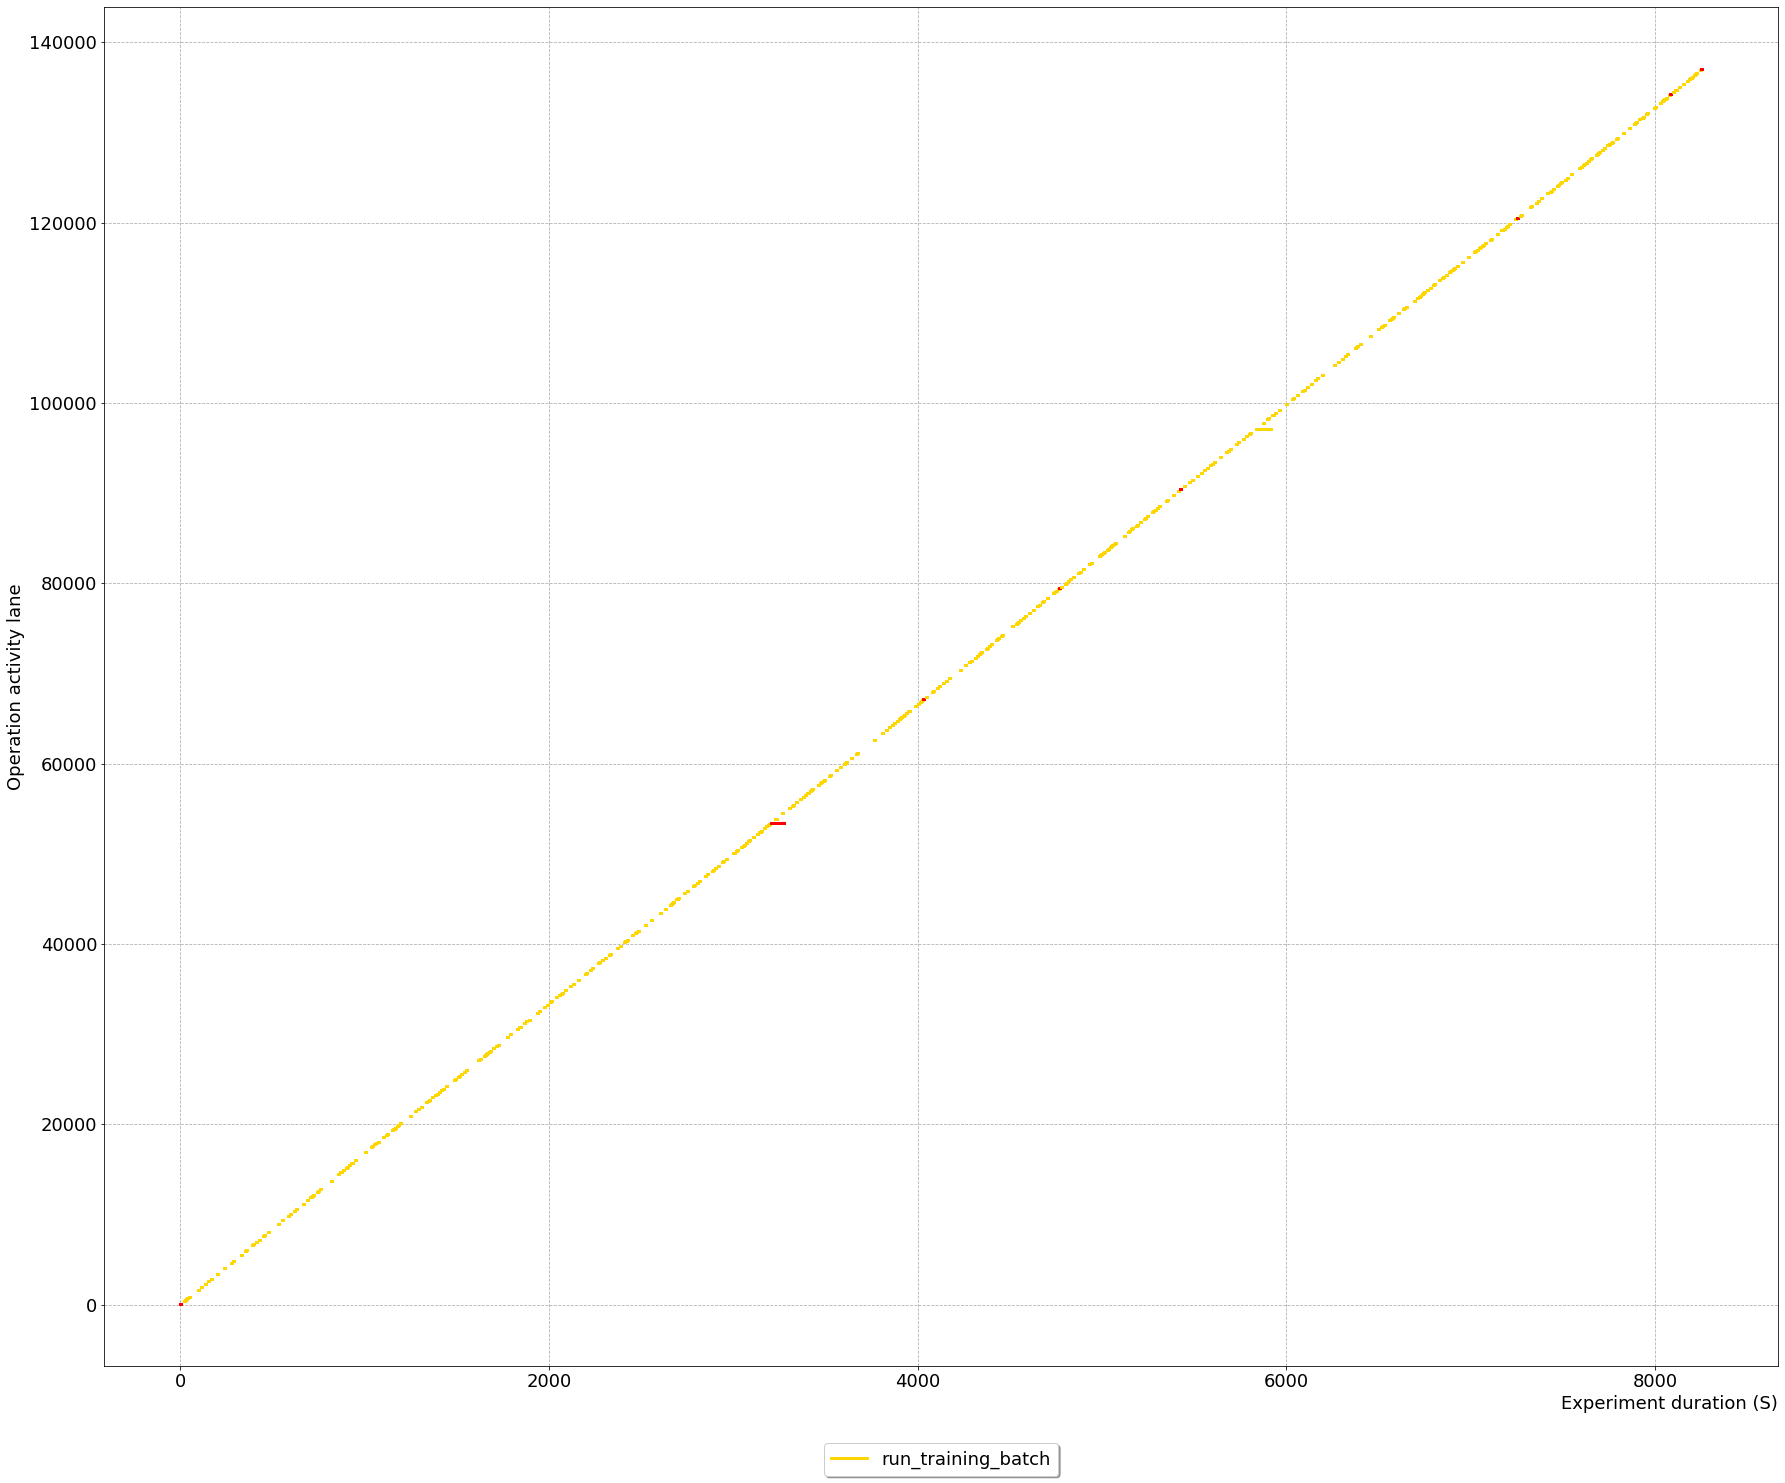

Num: 13700


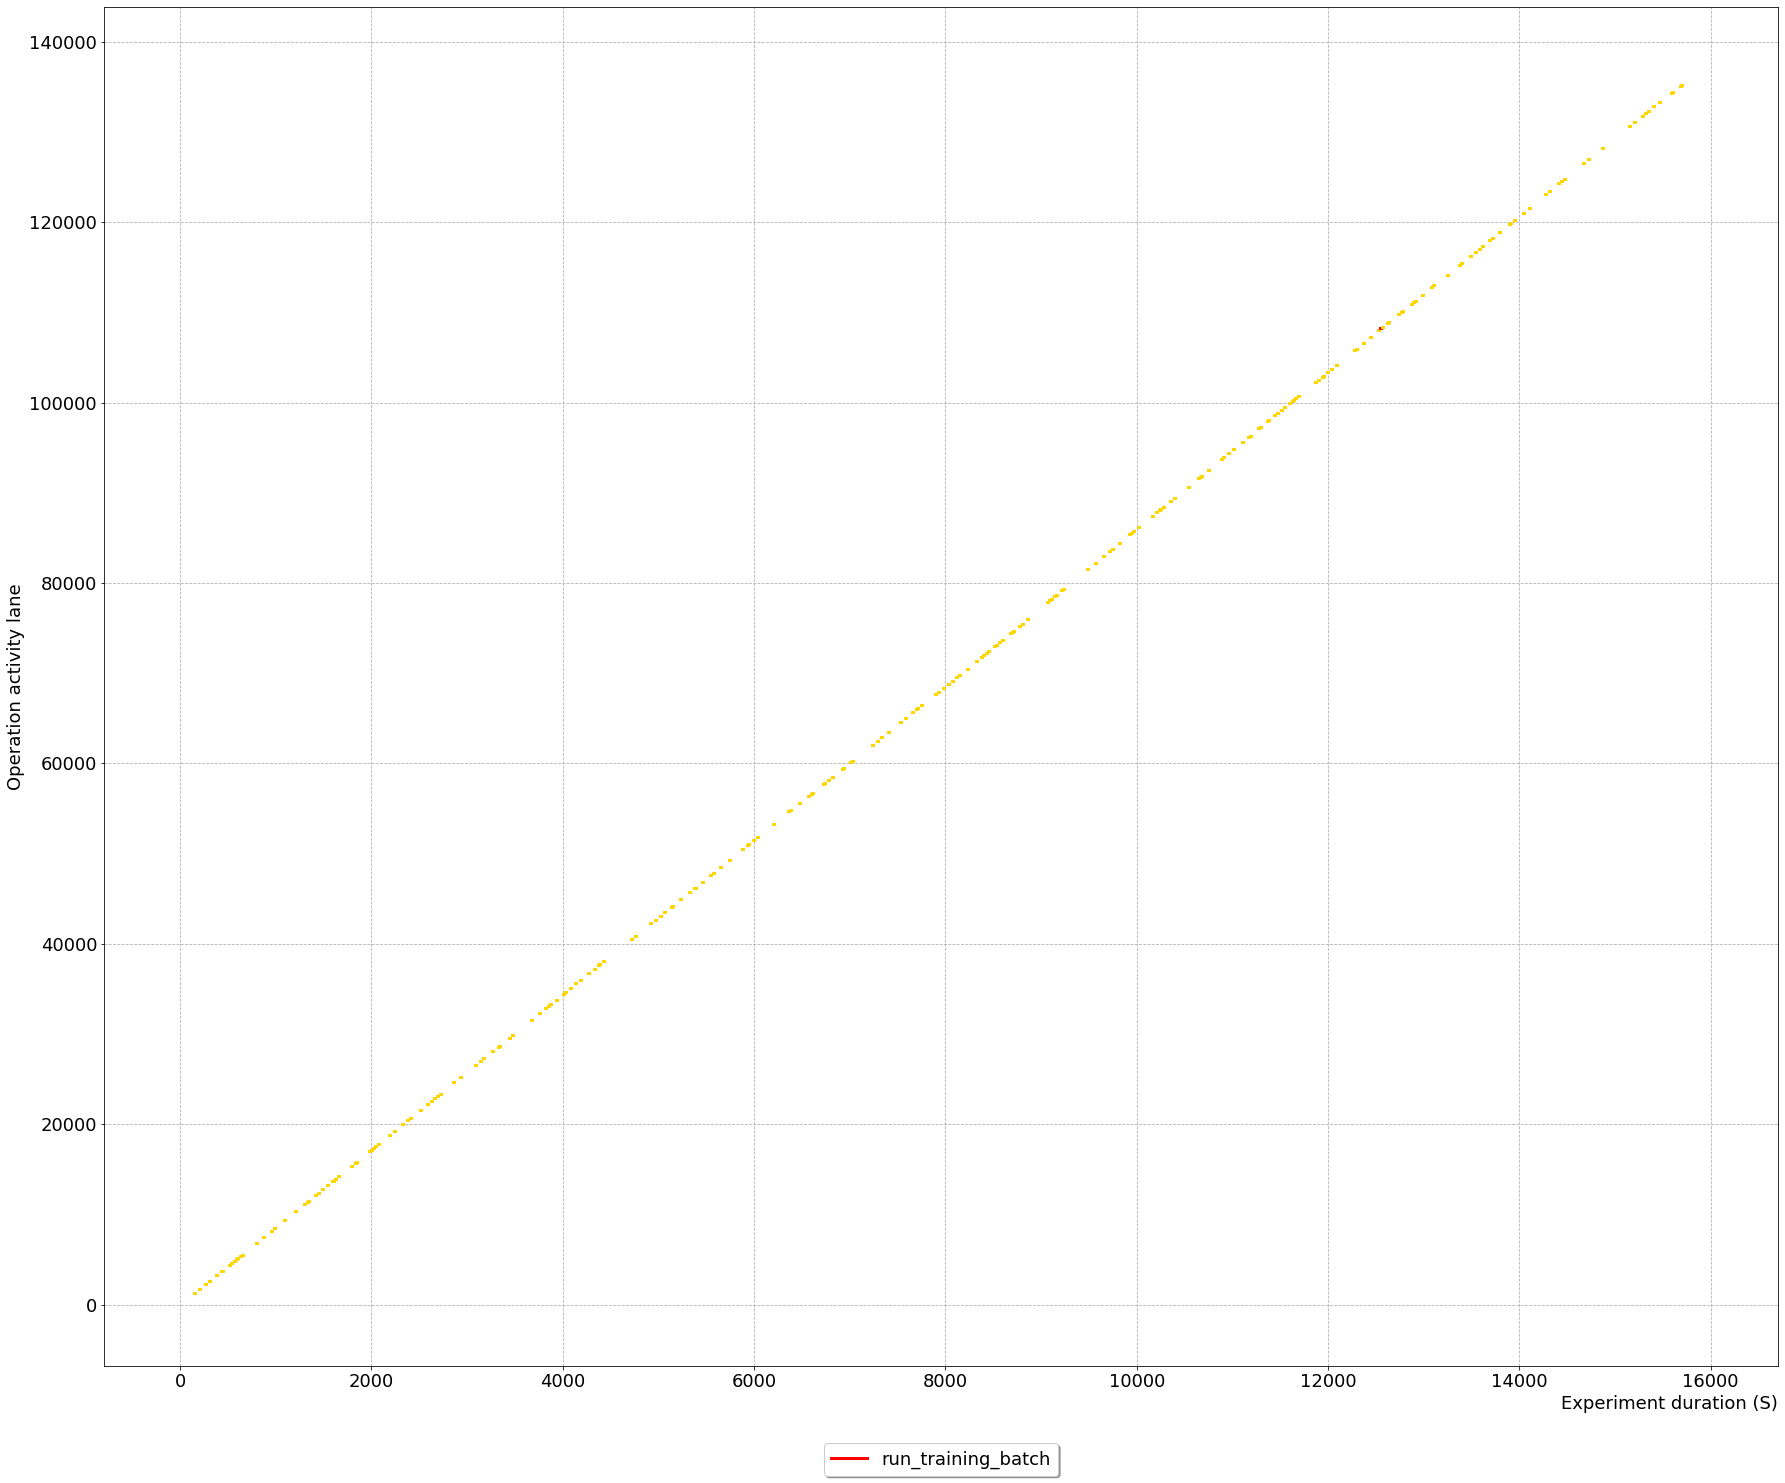

Num: 13700


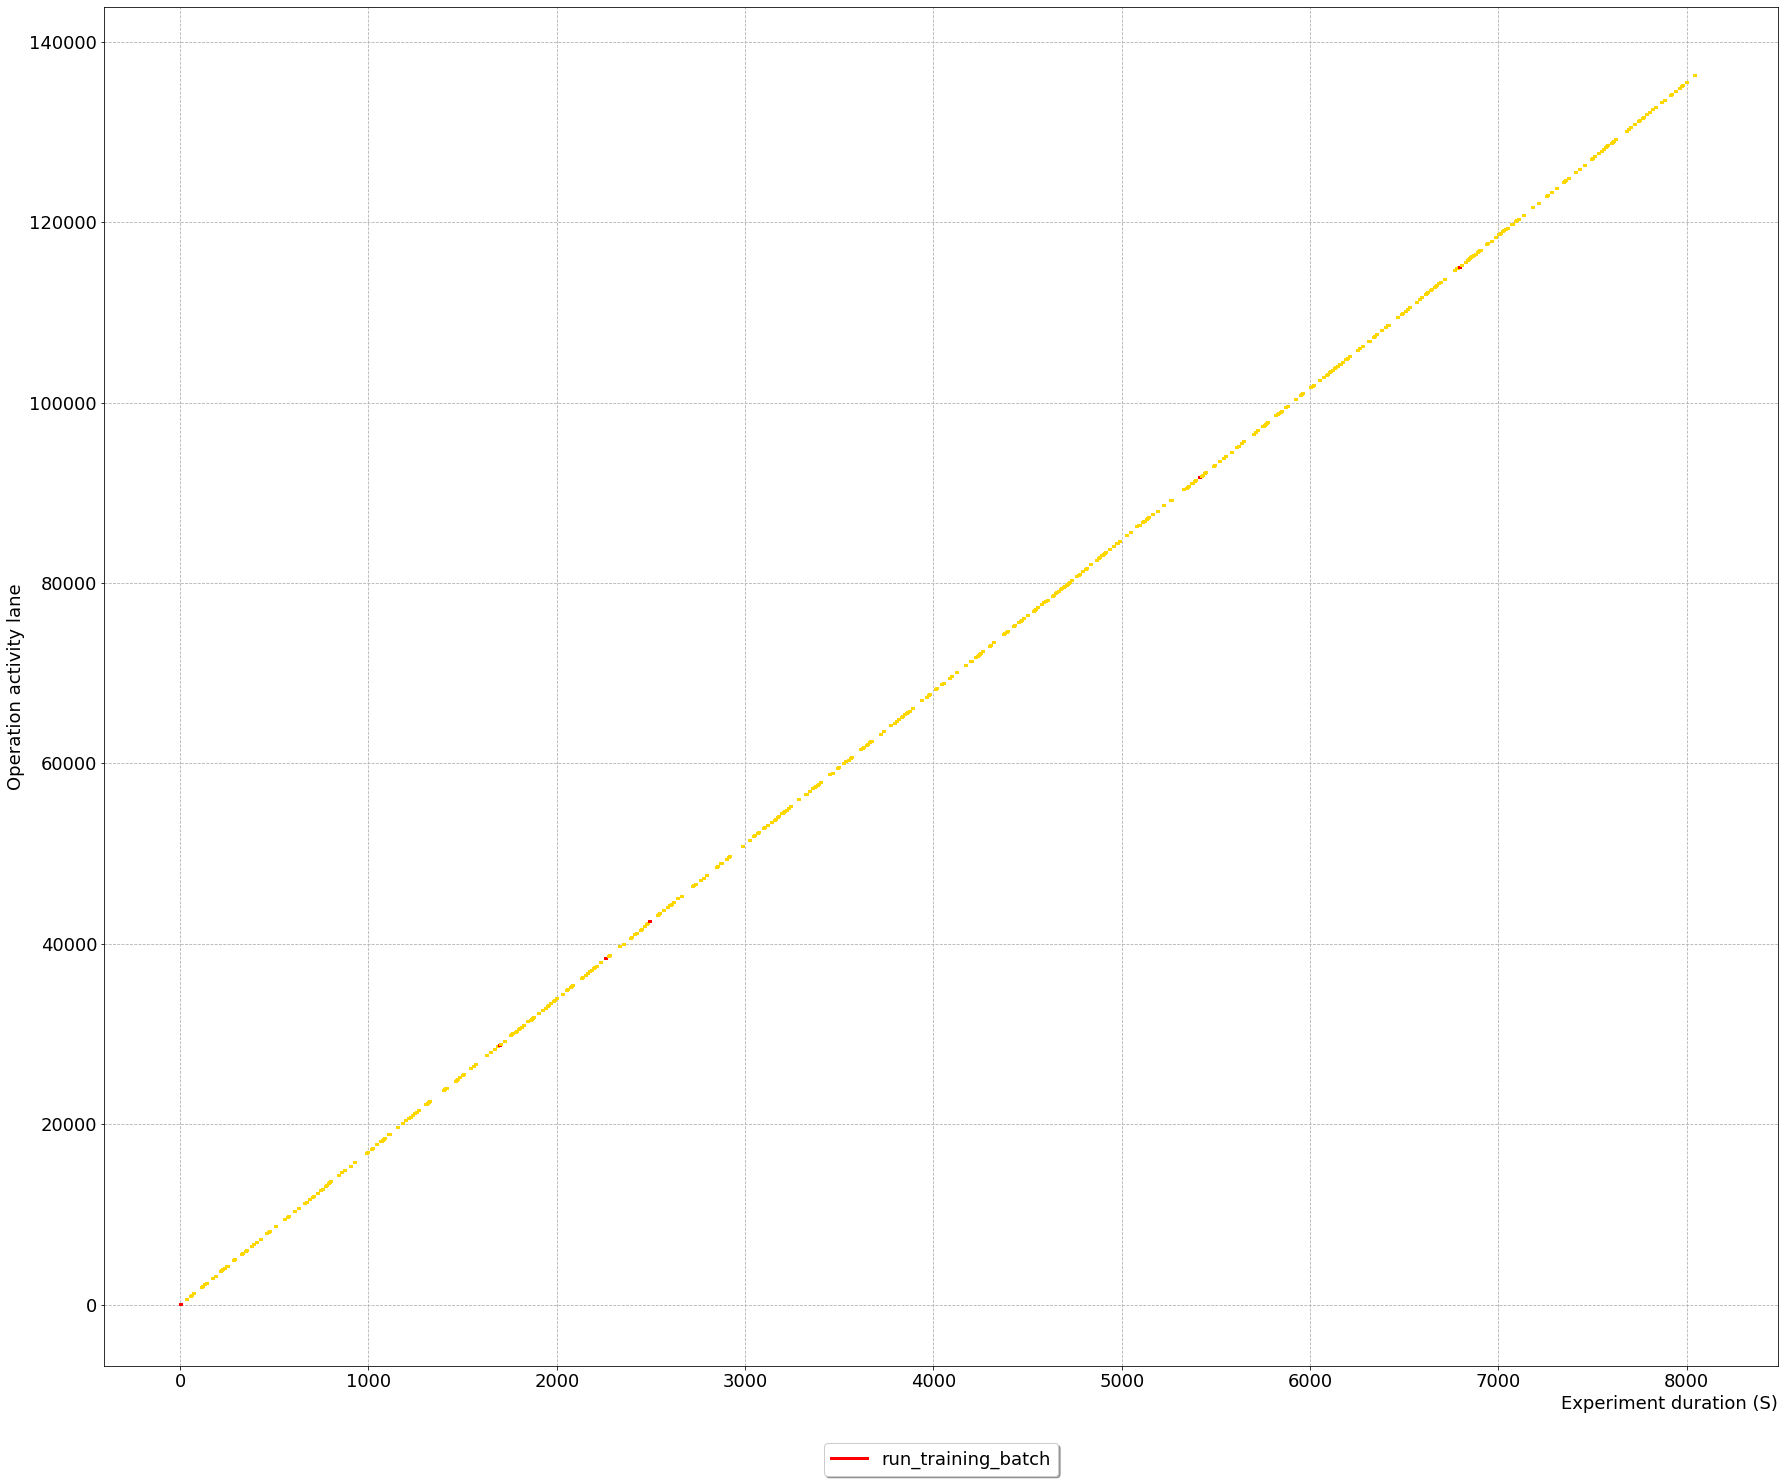

Num: 13700


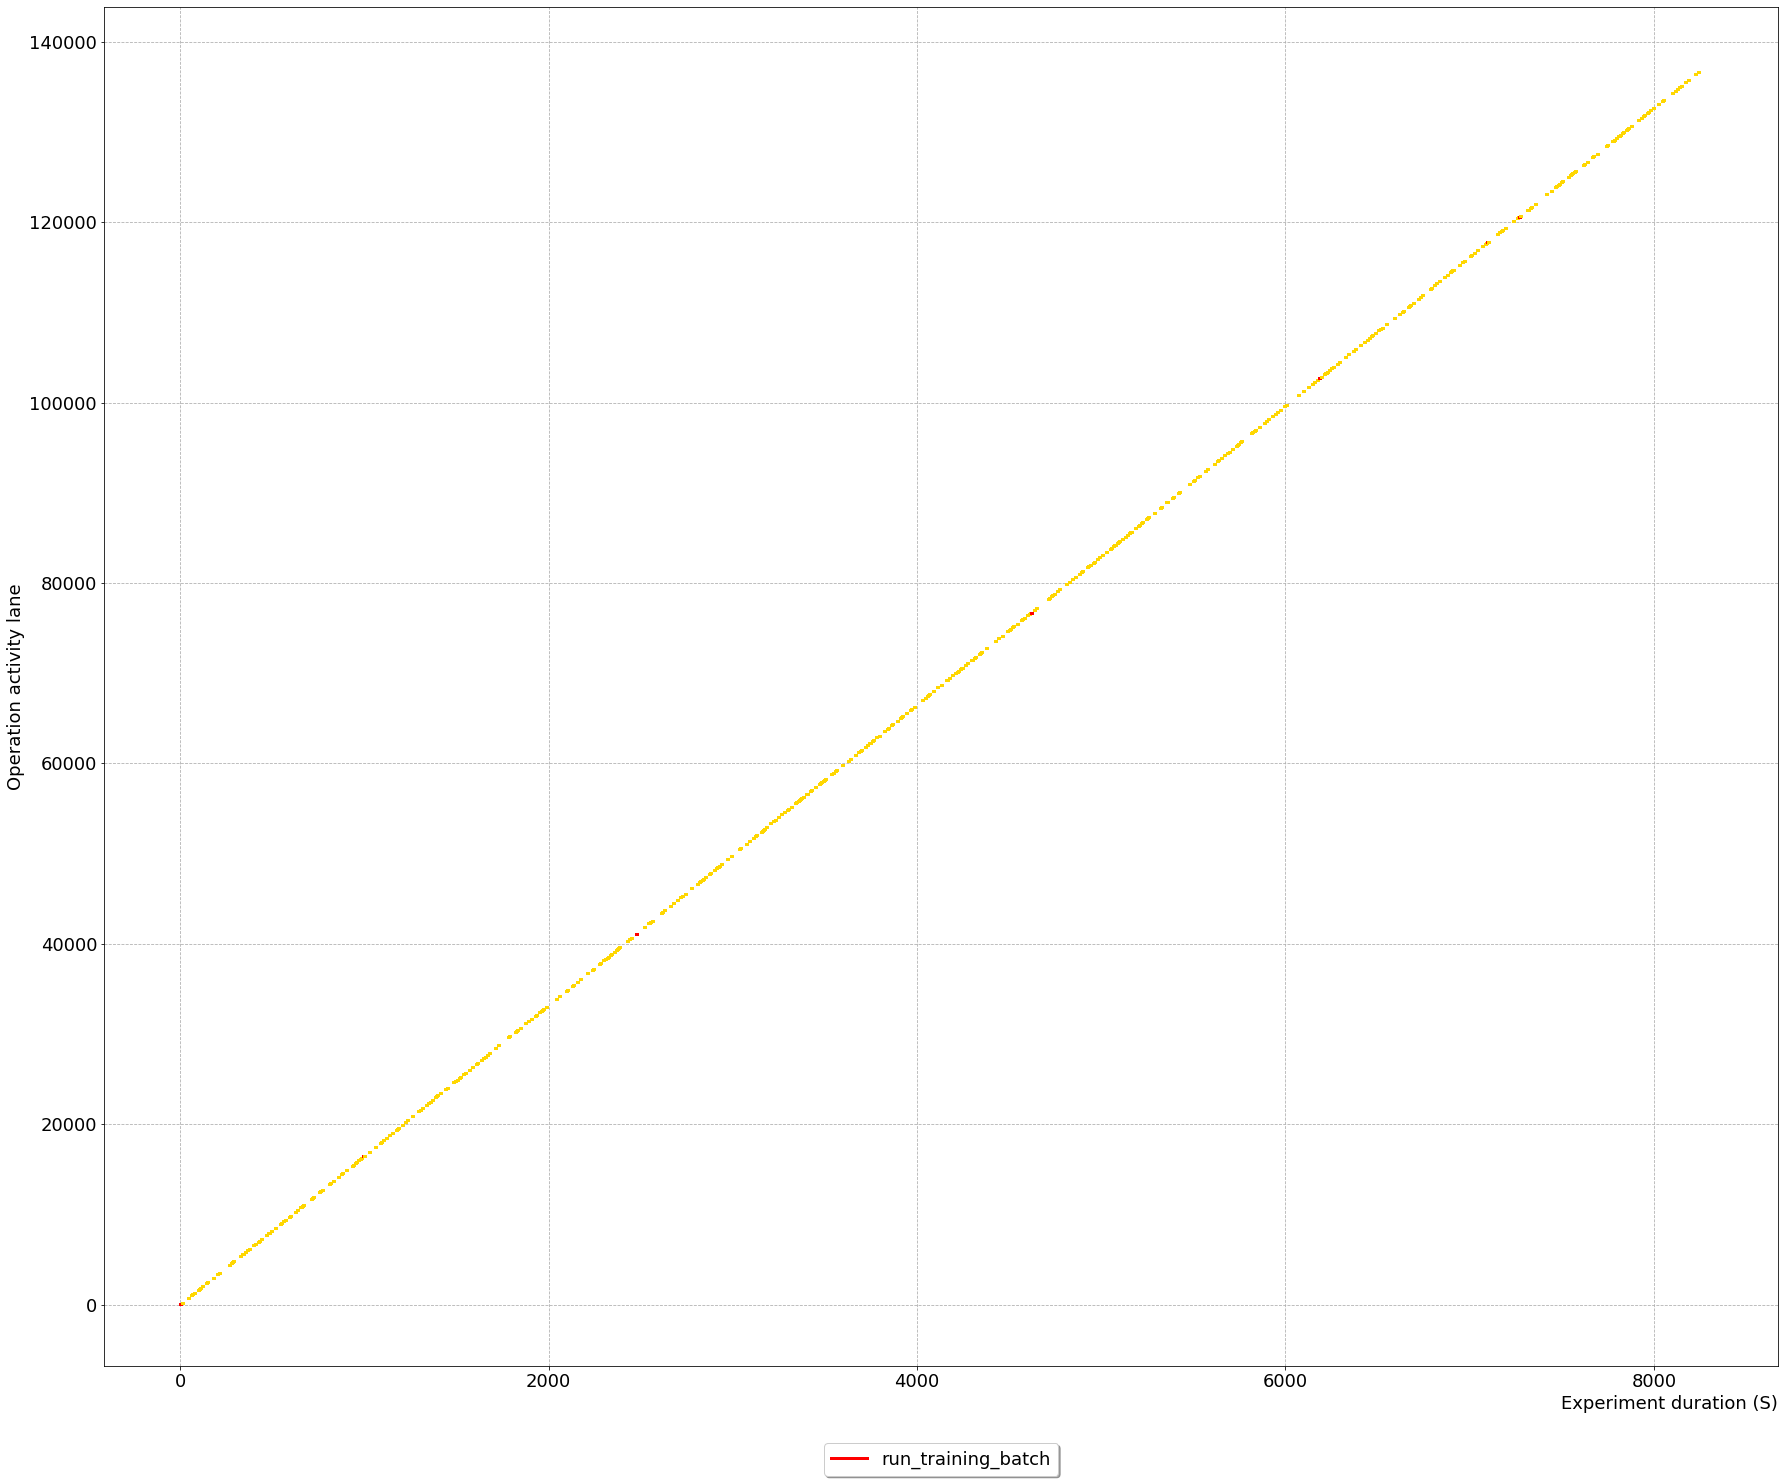

Num: 13700


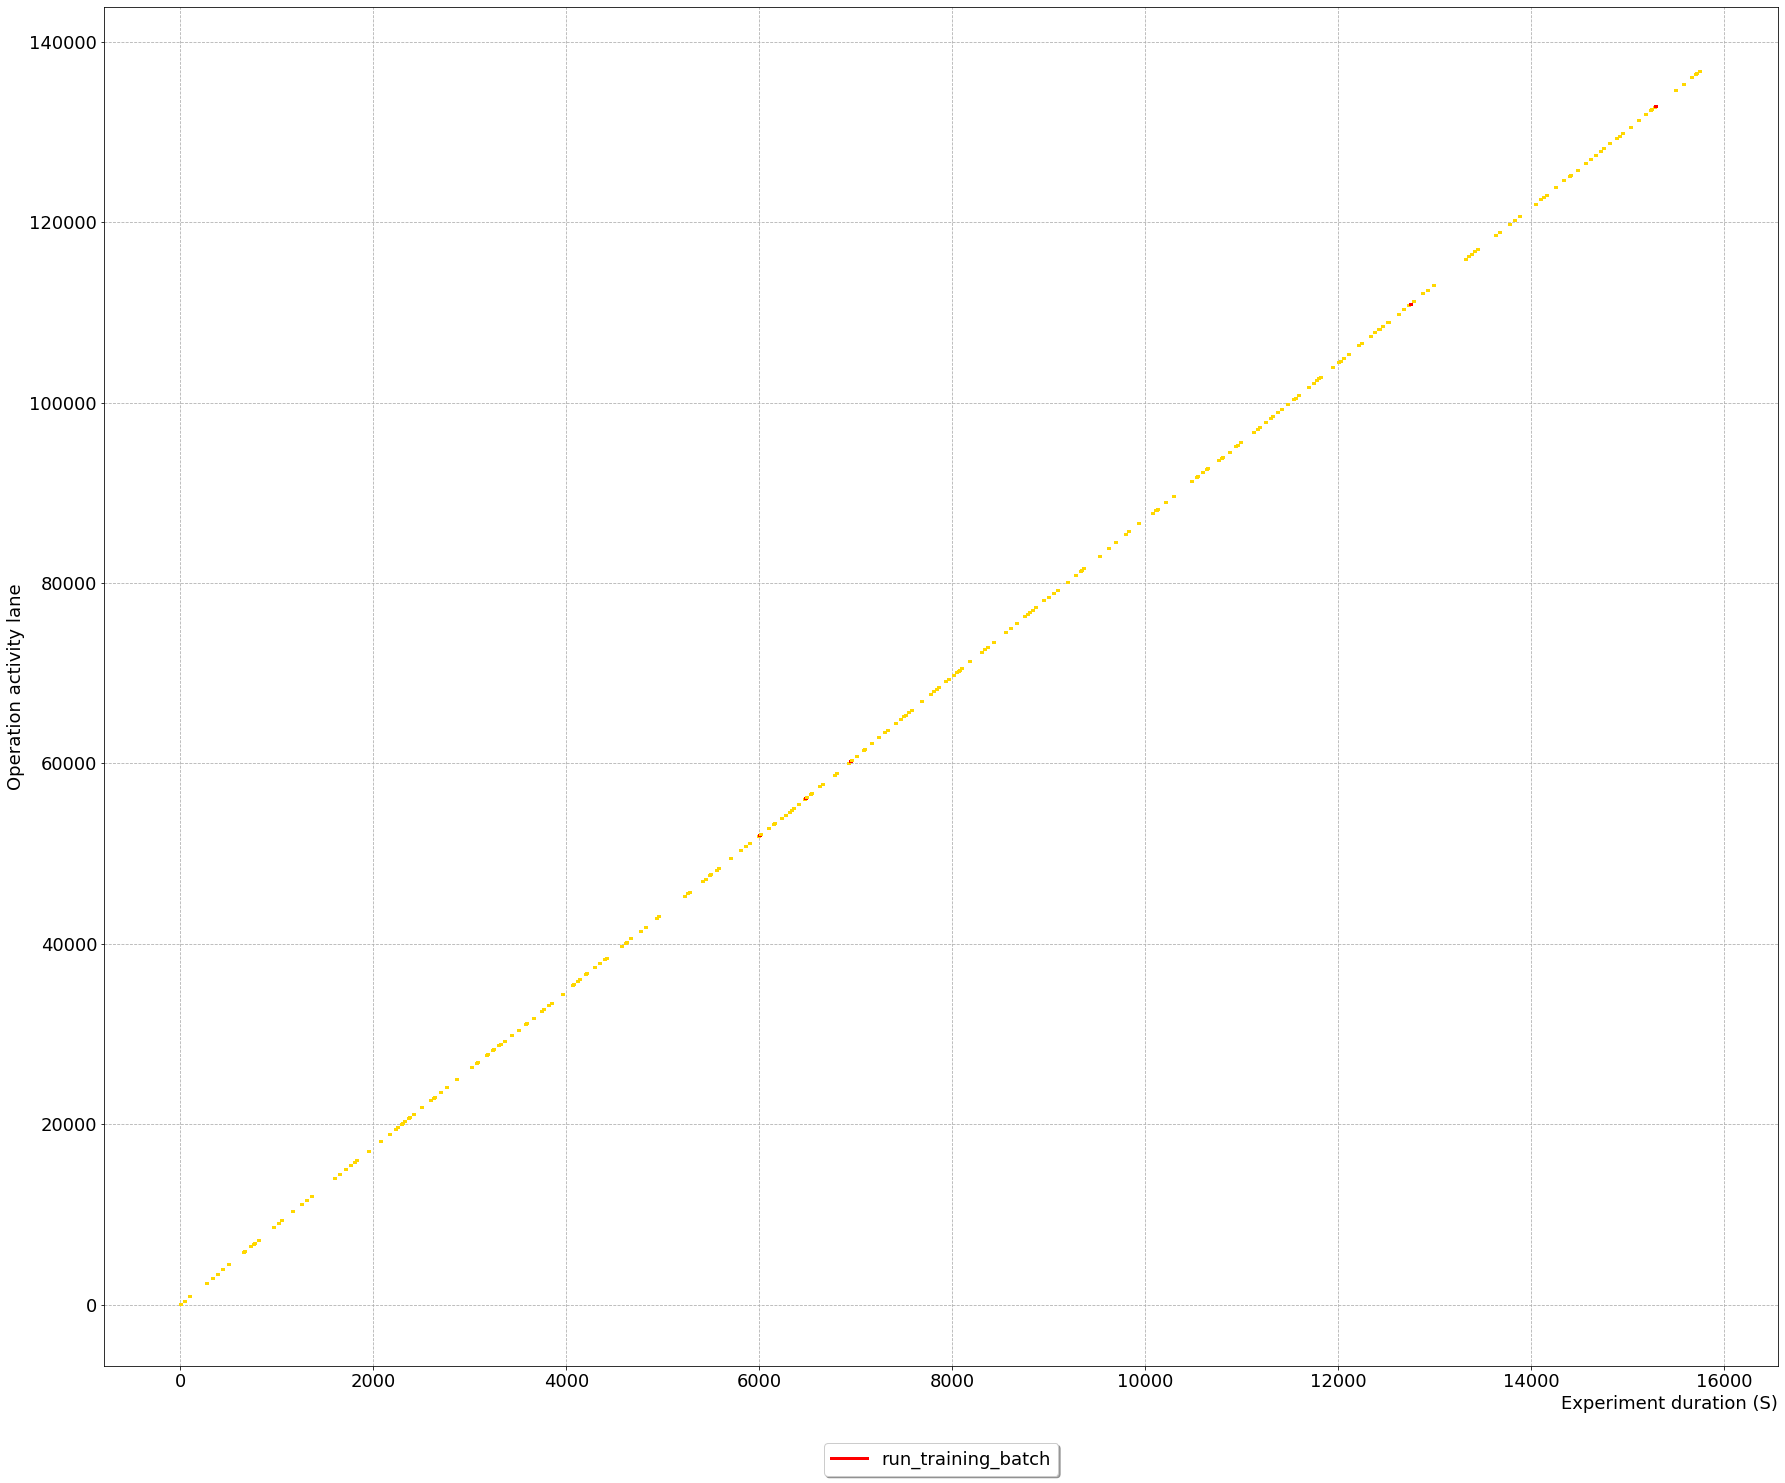

Num: 13700


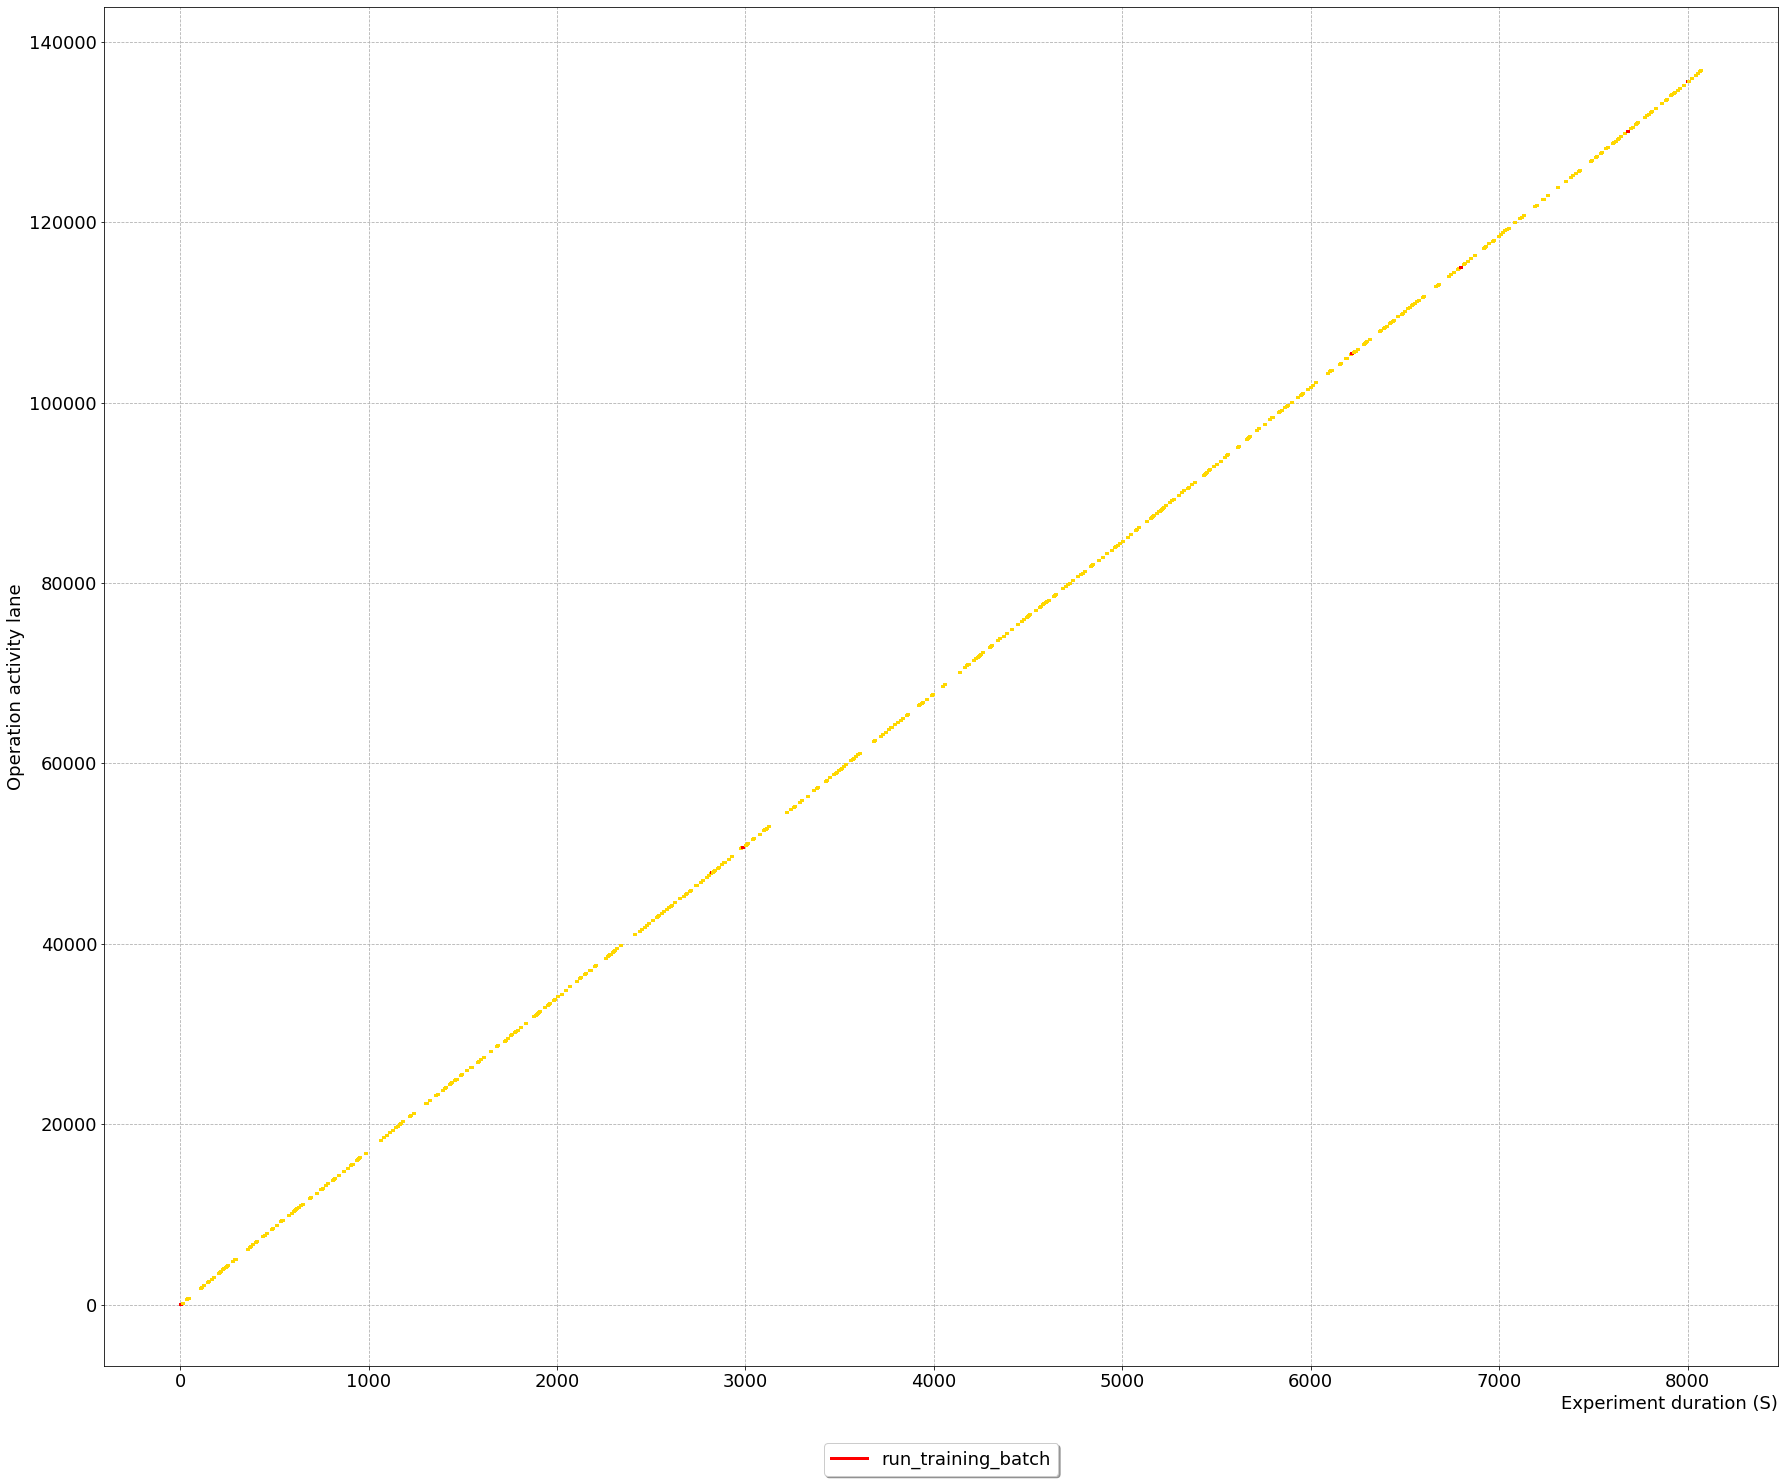

Num: 13702


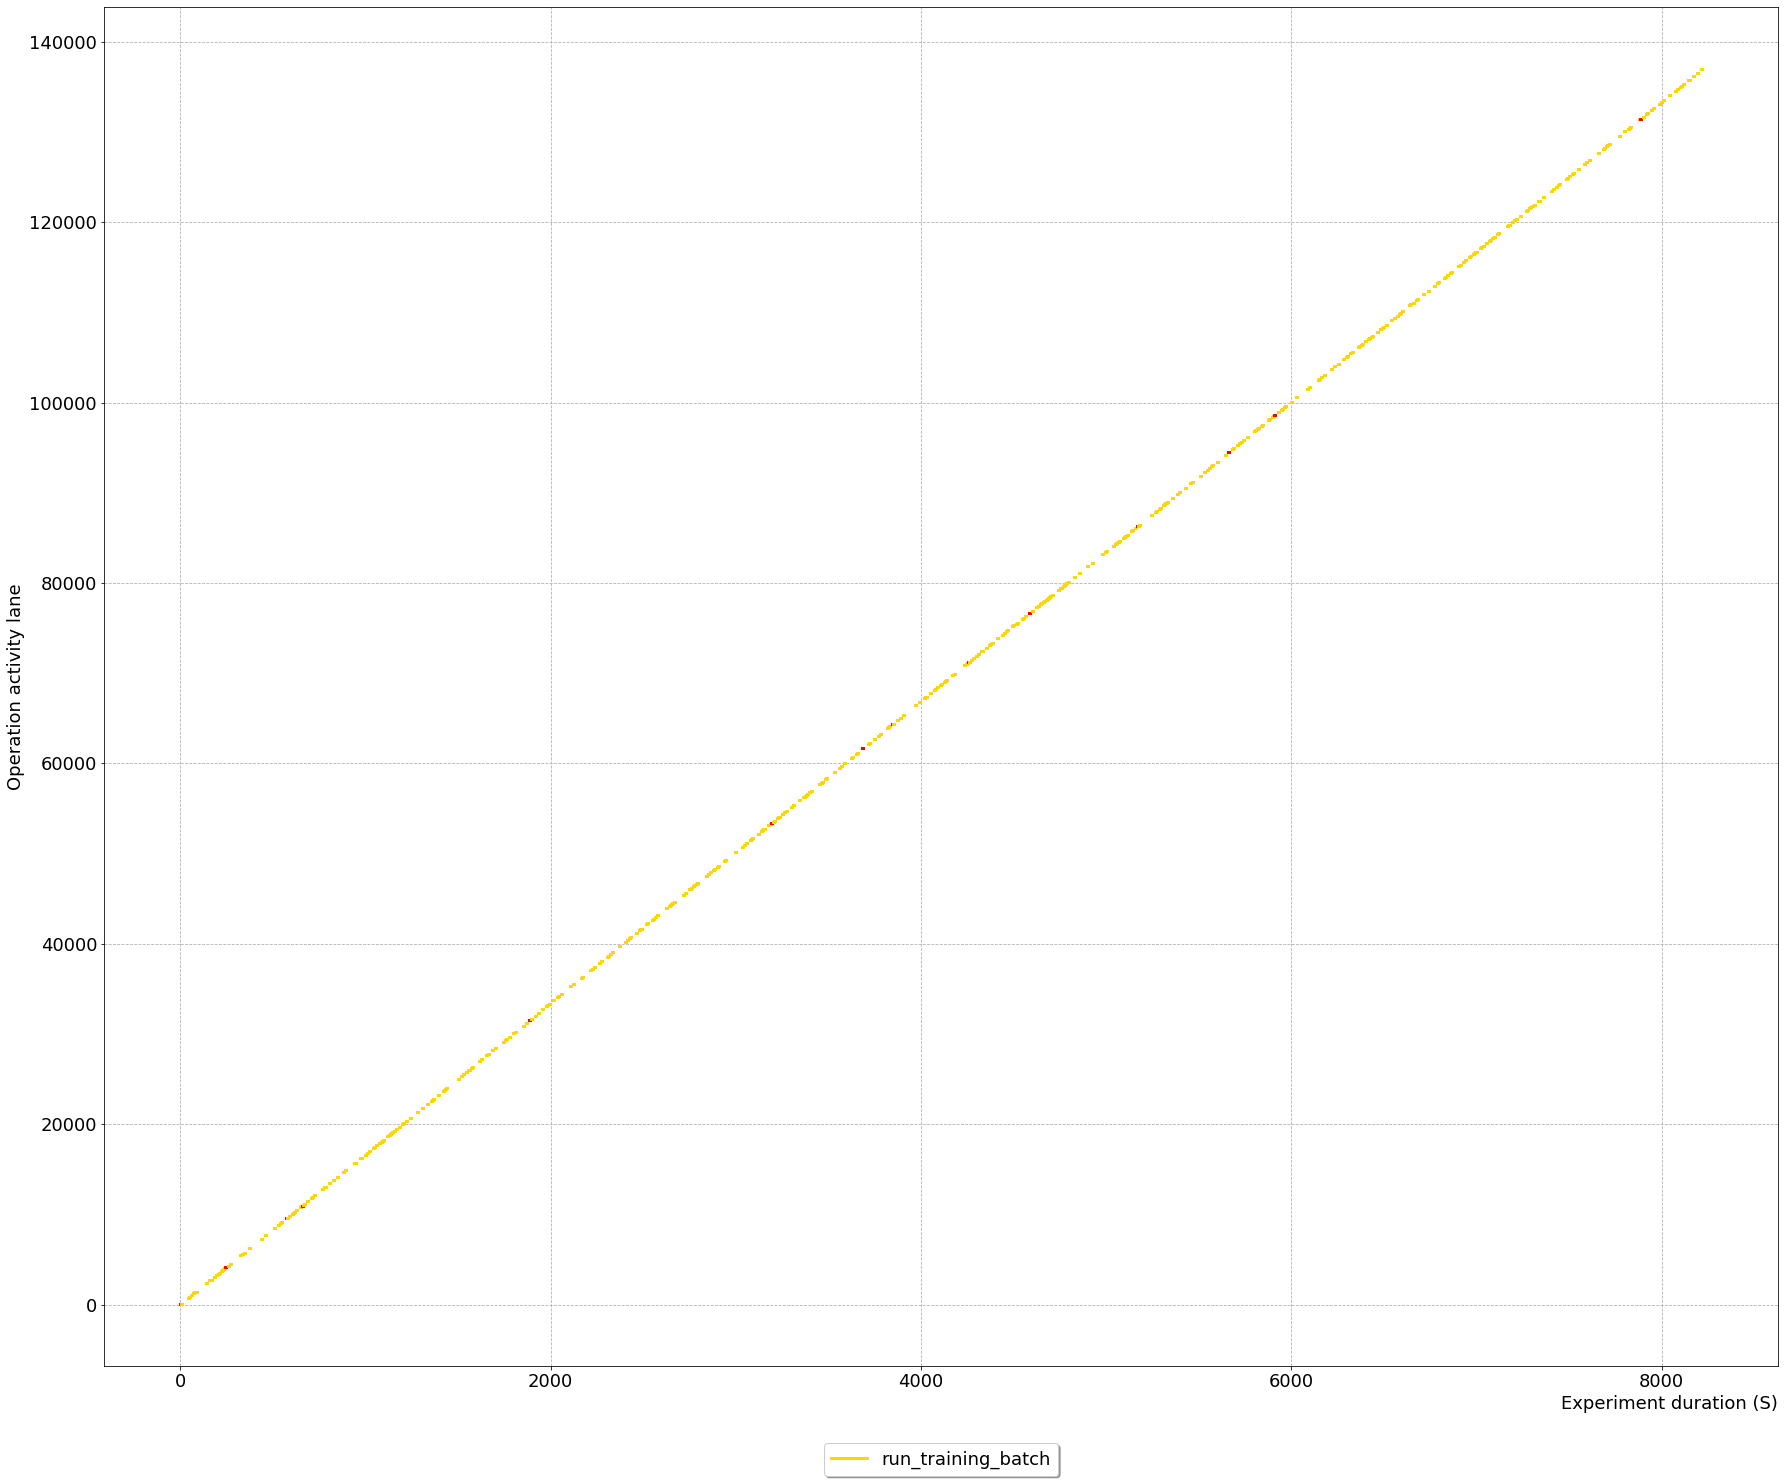

Num: 13700


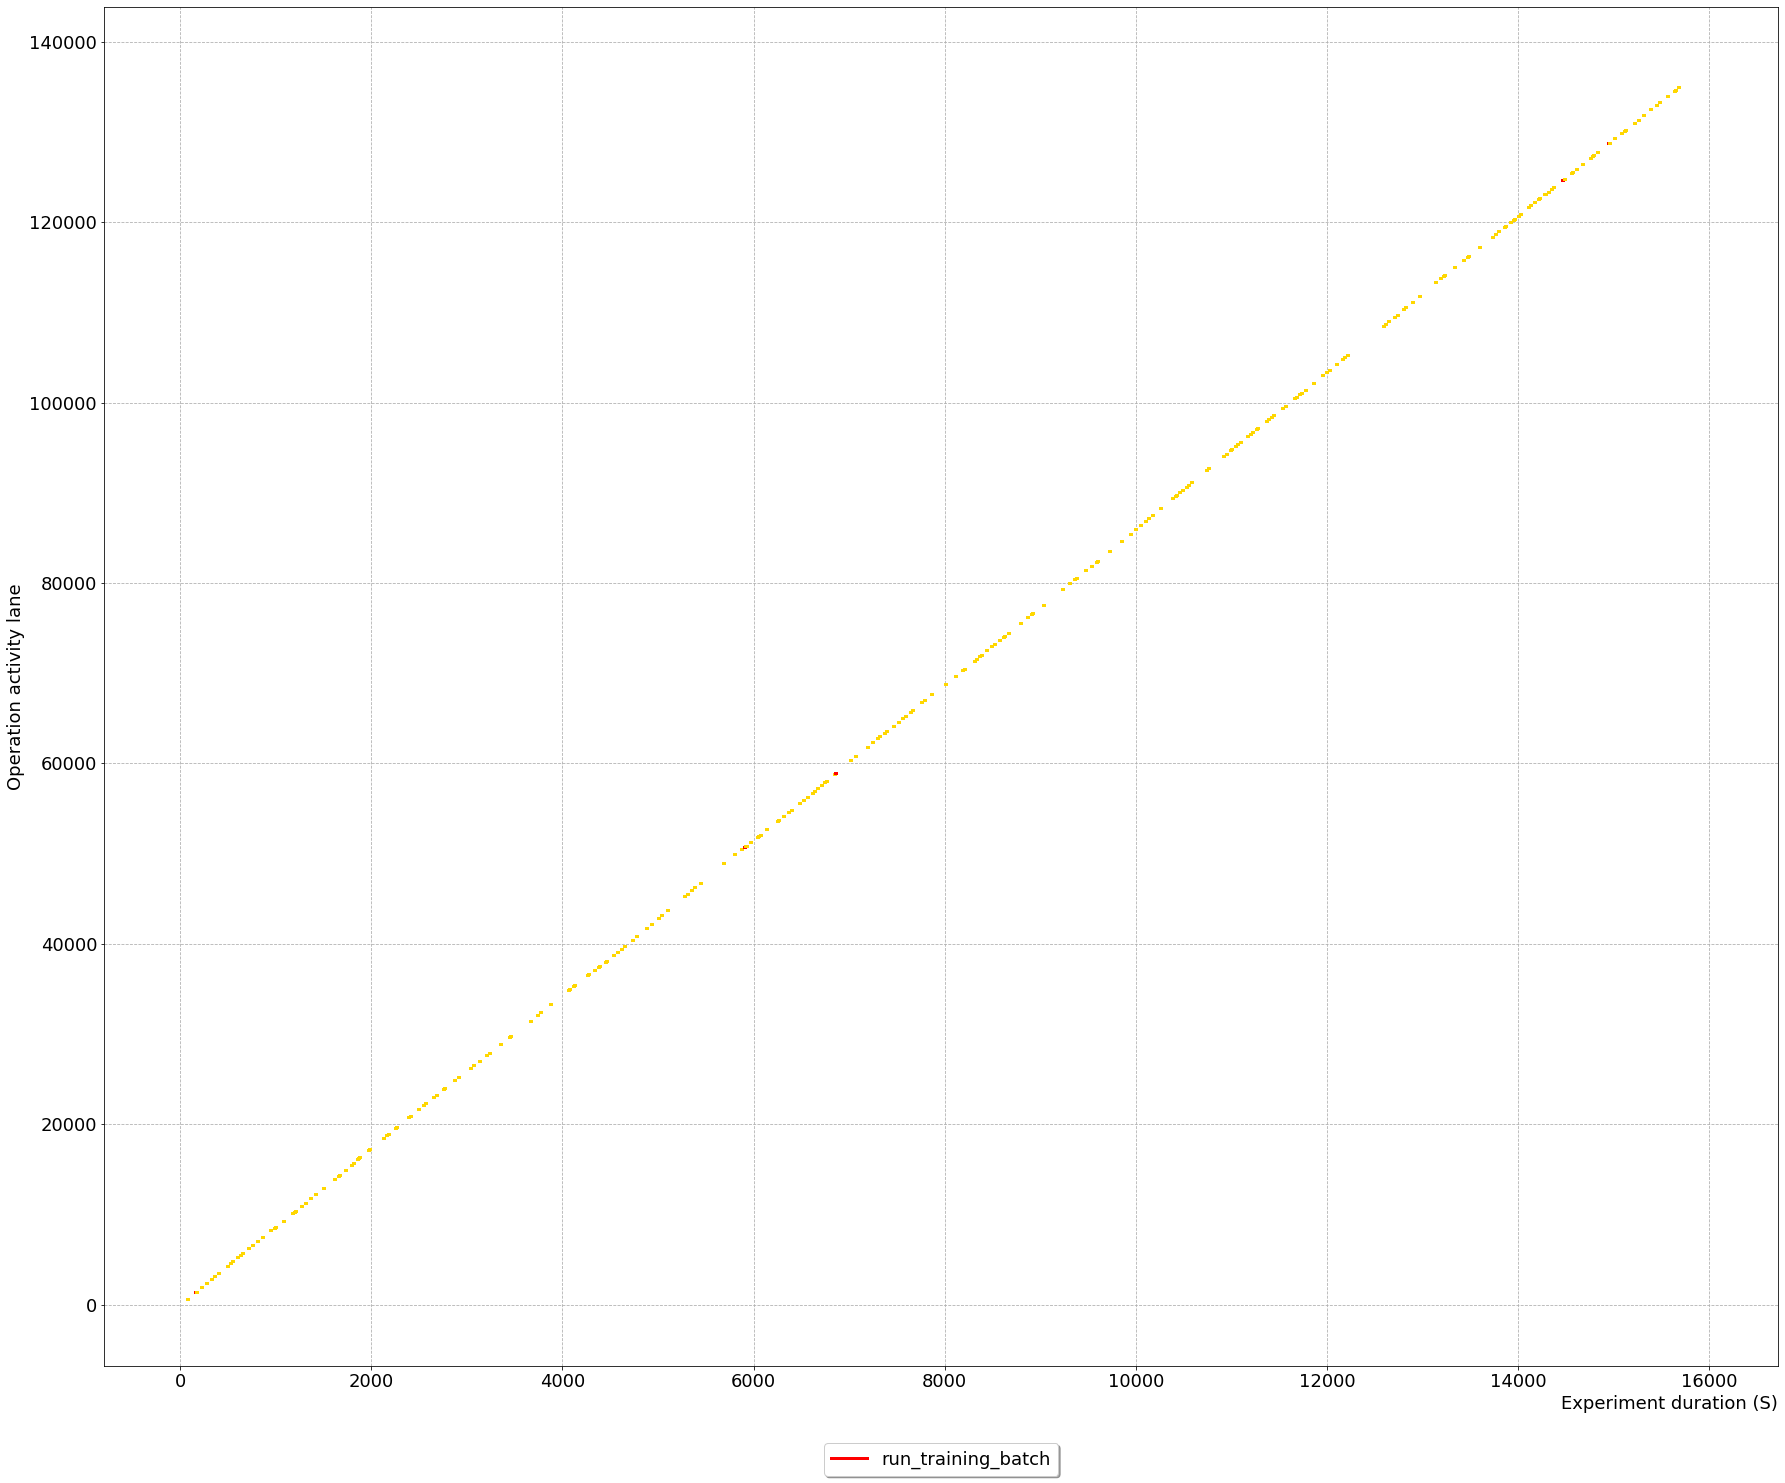

In [131]:
returns_scratch = []
function = "run_training_batch"

for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[(df_dataloader_scratch["run"]==run) & (df_dataloader_scratch["item_x"]==function)]
#     df = df_dataloader_scratch[(df_dataloader_scratch["run"]==run)]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    returns_scratch.append(show_timelines_with_gpu3(df, dfgpu, lanes, colors, run, batches_per_epoch, False, True, False, 2))
#     break

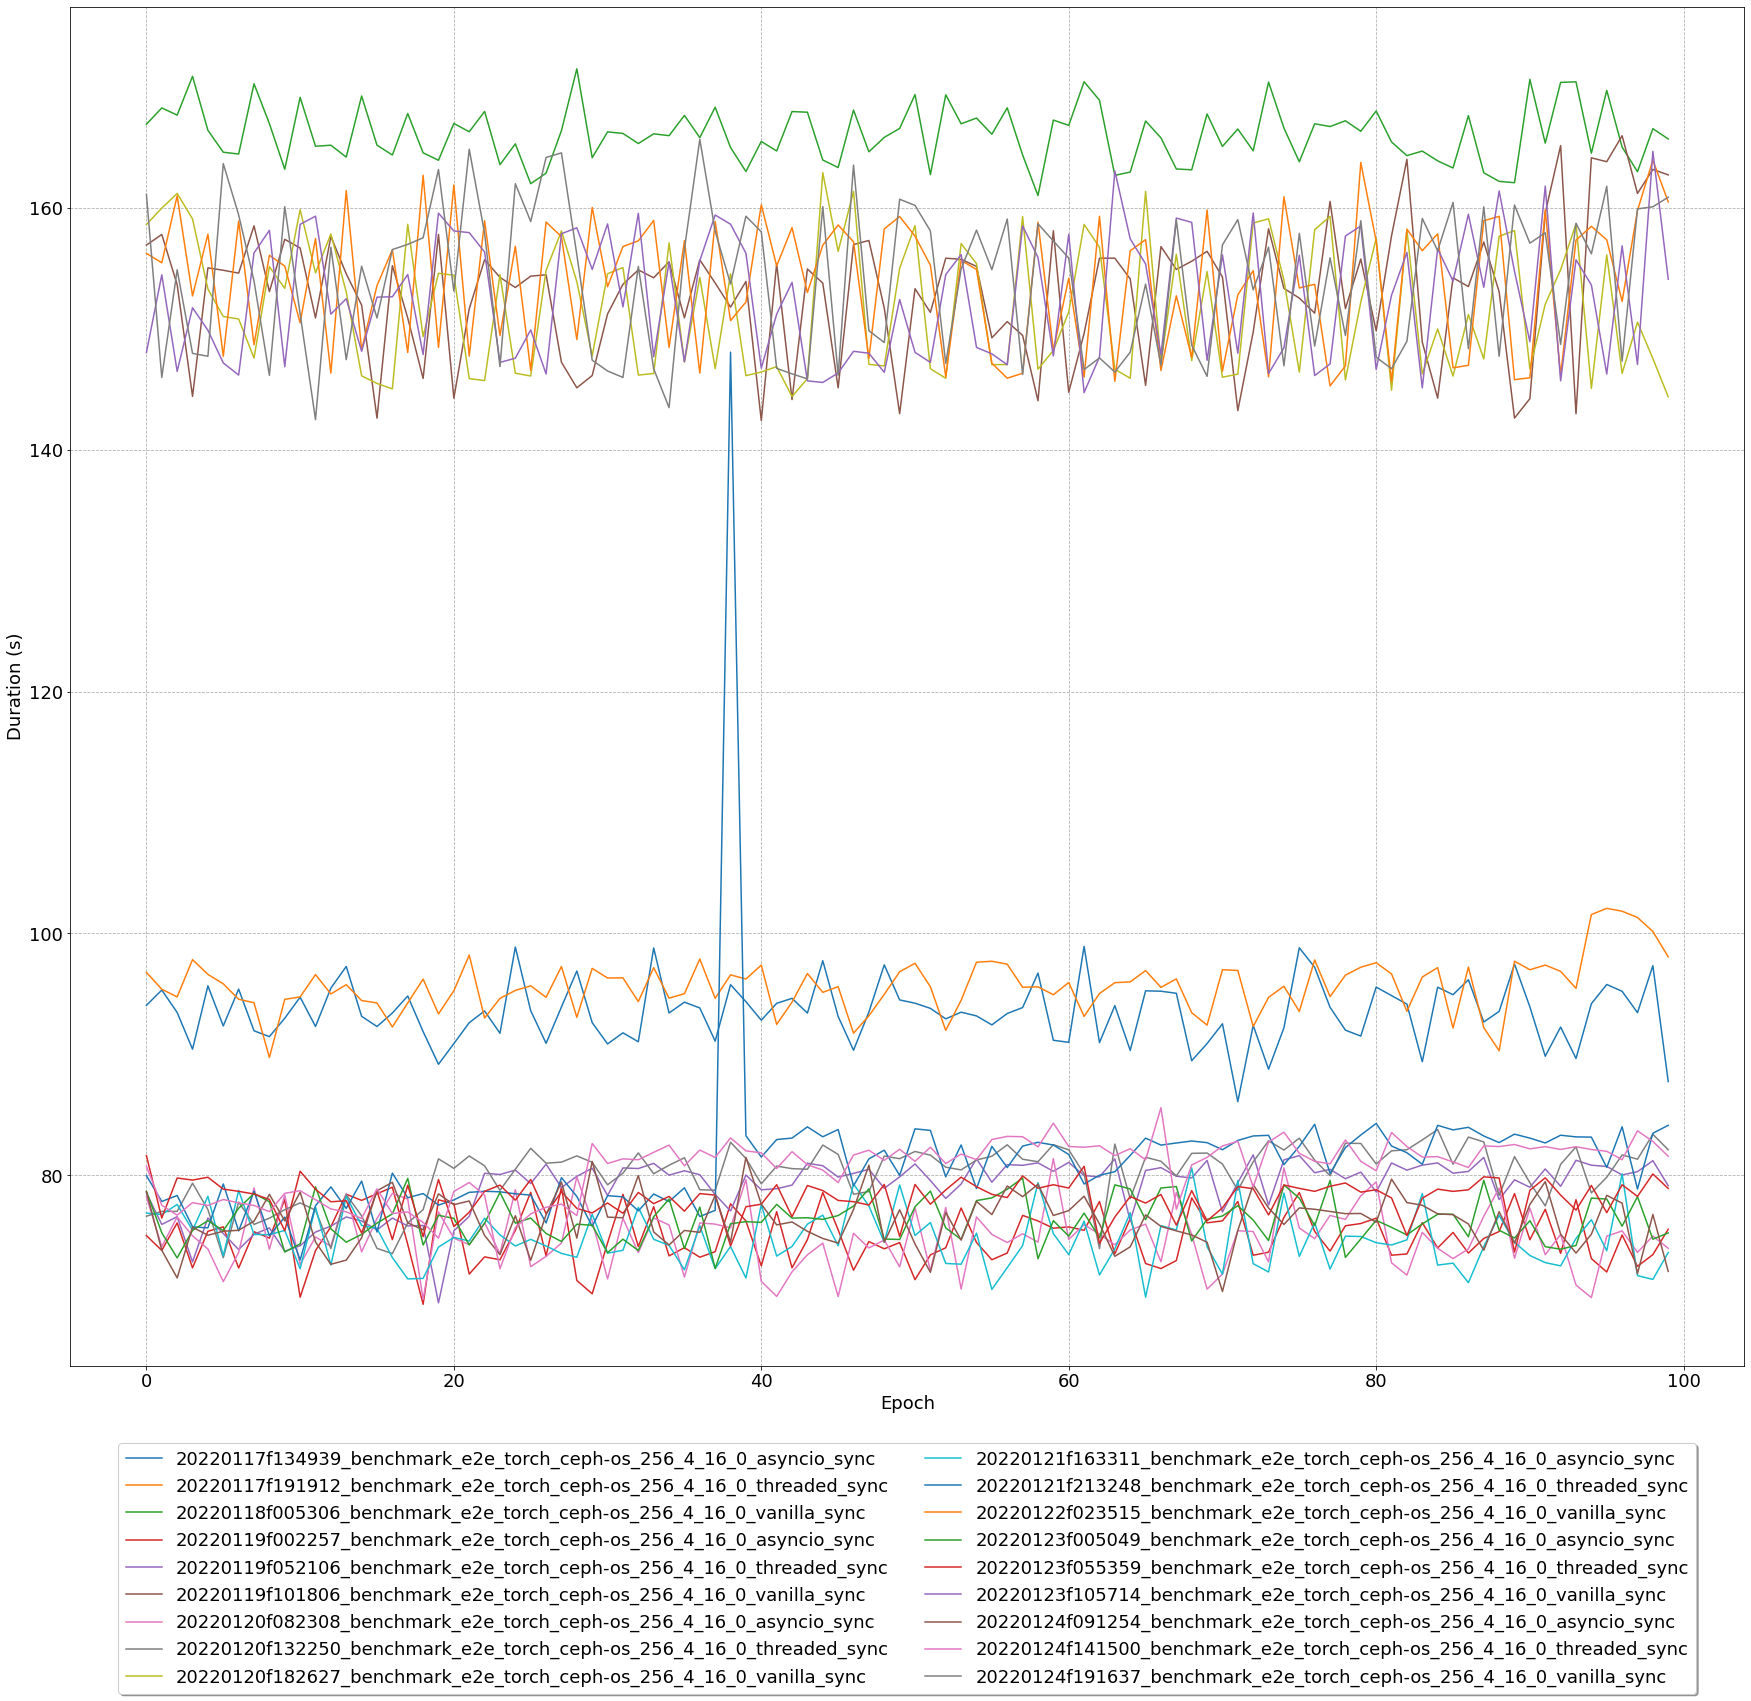

In [135]:
fig, ax = plt.subplots(figsize=(30, 25))
for i in returns_scratch:   
    epoch_len = [e2-e1 for e1, e2 in zip(i["epoch_starts"], i["epoch_ends"])]
    ax.plot(epoch_len, label=i["run"])
    ax.set_xlabel("Epoch")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
ax.set_ylabel("Duration (s)")
# ax.set_ylim([0, 120])
ax.grid(linestyle="--", which="both")
